# Descripción del proyecto

## Proyecto Final: Telecomunicaciones - identificar operadores ineficaces

En este proyecto se tiene la finalidad de estudiar el caso de la empresa _CallMeMaybe_ la cual desarrolla tareas de recibir y realizar llamadas por medio de operadores que atienden las necesidades de sus clientes, y necesitan identificar a aquellos operadores que tengan un desempeño ineficiente.

Los clientes son organizaciones que necesitan distribuir un gran número de llamadas entrantes o realizar llamadas a través de los operadores de CallMeMaybe.

Los datos con los que se cuentan estan dentro de dos datasets:

- `telecom_dataset_us.csv` : datos de los registros de las llamadas desarrolladas por los operadores de la empresa.
- `telecom_clients_us.csv` : datos de los clientes que contrataron los servicios de la empresa.

La forma en que se desarrollará este proyecto será en cinco pasos:

- Paso 1. Importar librerías y cargar datos.
- Paso 2. Análisis y depuración de datos.
- Paso 3. Análisis exploratorio de datos.
    - Paso 3.1. Identificación de operadores ineficientes.
    - Paso 3.2. Análisis de la atención al cliente.
- Paso 4. Pruebas de hipóteisis.
- Paso 5. Elaboración de conclusiones.

Además, se comparte un link de un archivo google drive para visualizar una presentación que contiene un resumen sobre los hallazgos generados para este proyecto:

https://drive.google.com/drive/folders/1mhMay6eaHVjjCo6qi500fzYSPFOaw8u1?usp=sharing

# Paso 1. Importar librerías y cargar los datasets.

En este paso solo se tiene la intención de cargar las librerías de pyhton que facilitarán el analisis de los datos contenidos en los dos datasets y asignar los dos datsets a variables del tipo `dataframe` para su disposición posterior.

In [1]:
# importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# carga de los datasets en dataframes
telecom_dataset_new = pd.read_csv('/datasets/telecom_dataset_us.csv')
telecom_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

# Paso 2. Análisis y depuración de los datos.

En este paso se tiene la intención de analizar los datos contenidos en los dataframes con el objetivo de buscar anormalidades en los datos que generen ruido y afecten negativamente al análisis de los mismos.

Lo que se pretende buscar son tres cosas primordiales:

-	Valores ausentes
-	Registros duplicados
-	Incongruencias en los tipos de datos contenidos en las columnas

En el caso de presentarse alguno de los tres puntos anteriores, se tratarán los datos conforme al objetivo requerido para solo contar con los registros que sean de relevancia para el análisis posterior.

## telecom_dataset_new

El primer dataframe que se analizará es `telecom_dataset_new`, se presenta:

- Una información general de las columnas contenidas en el dataframe.
- Un conteo de valores ausentes de todas las columnas (si es que existen).
- Un conteo de registros duplicados (si es que existen).
- El total de registros contenidos en el dataframe.
- Una descripción final de las columnas numéricas del dataframe.


In [3]:
# visualización incial del dataframe telecom_dataset_new
telecom_dataset_new.info()
print('-'*90)

print('Conteo de valores ausentes en las columnas:')
for col in telecom_dataset_new.columns:
  print(f'{col}: {len(telecom_dataset_new[telecom_dataset_new[col].isna()])}')
print('-'*90)

# conteo de registros duplicados
print(f'Número de registros duplicados: {telecom_dataset_new.duplicated().sum()}')
print('-'*90)

# total de registros
print(f'Total de registros: {len(telecom_dataset_new)}')
print('-'*90)

# descripción de las columnas numéricas
telecom_dataset_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
------------------------------------------------------------------------------------------
Conteo de valores ausentes en las columnas:
user_id: 0
date: 0
direction: 0
internal: 117
operator_id: 8172
is_missed_call: 0
calls_count: 0
call_duration: 0
total_call_duration: 0

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


En el bloque de código anterior se tiene una primer visualización del dataset `telecom_dataset_new` en donde se busca encontrar posibles defectos en los datos que puedan ser tratados para mejorar la calidad de estos.

Como primer punto importante, se visualiza que existen un total de 8172 valores ausentes en la columna "operator_id" y 117 valores ausentes en la columna "internal", se estudiarán estos registros para encontrar posibles anomalías que pudieran haber causado la ausencia de estos valores y definir el destino de estos registros.

También se realizó un conteo de los registros duplicados presentes en este primer dataframe arrojando un total de 4900 regsitros duplicados, siguiendo el procedimiento que con los valores ausentes, se estudairán estos registros para encontrar la razón de su aparción y definir si estos serán eliminados del dataset o si permanecerán dentro.

Finalmente, revisando los tipos de datos contenidos en cada columna, se tiene que la columna `date` almacena datos del tipo `object`, se necesita realizar un cambio al tipo de dato `datetime64[ns]`, para poder disponer de los datos conteindos en esta columna y emplear sus métodos de mejor manera posteriormente. Otra columna a tratar el tipo de dato es en la columna `operator_id` el cual se tiene un tipo de dato `float64`, dada la naturaleza de los identificadores que trabajan con números sin parte decimal, se cambiará el tipo de dato de esta columna al tipo `int`.

Descrito lo anterior, no se observan más áreas de mejora en la consistencia de los datos.

### Valores ausentes - telecom_dataset_new

In [4]:
# registros con valores ausentes en la columna 'operator_id'
print(telecom_dataset_new[telecom_dataset_new['operator_id'].isna()])
print('-'*90)

#  descripción de las columnas numéricas de los registros que no cuentan con un identificador de operador
telecom_dataset_new[telecom_dataset_new['operator_id'].isna()].describe()

       user_id                       date direction internal  operator_id  \
0       166377  2019-08-04 00:00:00+03:00        in    False          NaN   
7       166377  2019-08-05 00:00:00+03:00        in    False          NaN   
9       166377  2019-08-06 00:00:00+03:00        in    False          NaN   
17      166377  2019-08-07 00:00:00+03:00        in    False          NaN   
27      166377  2019-08-12 00:00:00+03:00        in    False          NaN   
...        ...                        ...       ...      ...          ...   
53876   168601  2019-11-27 00:00:00+03:00        in    False          NaN   
53880   168601  2019-11-28 00:00:00+03:00        in    False          NaN   
53889   168603  2019-11-28 00:00:00+03:00        in    False          NaN   
53893   168606  2019-11-08 00:00:00+03:00        in    False          NaN   
53901   168606  2019-11-19 00:00:00+03:00        in    False          NaN   

       is_missed_call  calls_count  call_duration  total_call_duration  
0 

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,8172.000000,0.0,8172.000000,8172.000000,8172.000000
mean,167256.867719,NaN,13.915321,66.013828,233.756118
std,586.989963,NaN,81.205371,954.840945,1252.370402
min,166377.000000,NaN,1.000000,0.000000,0.000000
25%,166782.000000,NaN,1.000000,0.000000,7.000000
50%,167125.000000,NaN,2.000000,0.000000,35.000000
75%,167727.000000,NaN,7.000000,0.000000,115.000000
max,168606.000000,NaN,2168.000000,26175.000000,42667.000000


In [5]:
# copia del dataframe original
telecom_dataset_clean = telecom_dataset_new.copy()

# supresión de los registros que cuentan no cuentan con un identifiacdor de operador
telecom_dataset_clean = telecom_dataset_clean.dropna(subset=['operator_id'])

# Contabilización de regsitros antes vs después
print(f'Cantidad de registros antes: {len(telecom_dataset_new)}')
print(f'Cantidad de registros después: {len(telecom_dataset_clean)}')
print(f'Porcentaje de regsitros eliminados con valores ausentes: {((len(telecom_dataset_new) - len(telecom_dataset_clean))/len(telecom_dataset_new))*100:.2f}%')

Cantidad de registros antes: 53902
Cantidad de registros después: 45730
Porcentaje de regsitros eliminados con valores ausentes: 15.16%


En los anteriores dos bloques de código se desarrolla código para visualizar lo sigueinte:
- Como lucen los datos en donde hay ausencia de un identificador de operador.
- El conteo de las llamdas clasificadas como perdidas o no.
- Una descripción de los valores contenidos en las columnas numéricas.

Con lo anterior se puede decir que existen inconsistencias lógicas entre los datos, un ejemplo de esto es que se contabilizan llamadas que fueron categorizadas como perdidas la cuales siempre muestran un valor de cero en la columna `call_duration` lo cual es correcto, pero la columna referente a la duración total de la llamada muestra valores irreales para los tiempos de espera entre las llamdas de distintos días. Si una llamada no se atendió ¿Cómo puede ser que tenga tanta duración? teniendo como valor máximo 42667 segundos.

La mediana de duración de estas llamadas fueron de 35 segundos lo cual puede ser "normal" dependiendo de la razón de las llamadas, pero la media de duración de estas llamadas es de 233.75 segundos, un equivalente a 3.89 minutos, lo cual es poco probable que el valor de 42667 segundos equivalente a 11.85 horas se trate de un valor normal.

Además, el objetivo de el análisis de estos datos es visualizar el desempeño de los operadores, y dado a que los 8172 registros que no cuentan con un valor en su identificador de operador, no se pueden rellenar estos valores ausentes con identificadores aleatorios porque se estaría introduciendo ruido en los datos y generando sesgos que alteren las métricas a considerar para evaluar el desempeño de los operadores.

Teniendo las explicaciones anteriores, se optó por crear una copia del dataframe original en donde se suprimieron estos registros con valores ausentes en la columna `operator_id`, teniendo como resultado que se omitieron 15.16% de registros de la cantidad inicial, esto no supone ningún riesgo de afectar negativamente los datos por lo anteriormente mencionado, se busca evaluar el desempeño del operador y no se puede contabilizar arbitrariamente estos registros que no cuentan con un identificador para estos.

In [6]:
# registros con valores ausentes en la columna 'internal'
print(telecom_dataset_clean[telecom_dataset_clean['internal'].isna()].head(15))
print('-'*90)

# cantidad de regsitros con ausencia de valores en la columna "internal"
print(f"Número de registros con ausencia de valores en la columna 'internal': {len(telecom_dataset_clean[telecom_dataset_clean['internal'].isna()])}")
print('-'*90)

# tipo de llamadas de los registros con valor ausente en la columna direction
print(telecom_dataset_clean[telecom_dataset_clean['internal'].isna()]['direction'].value_counts())
print('-'*90)

#  descripción de las columnas numéricas de los registros que no cuentan con un identificador de operador
telecom_dataset_clean[telecom_dataset_clean['internal'].isna()].describe()

       user_id                       date direction internal  operator_id  \
1924    166406  2019-09-02 00:00:00+03:00        in      NaN     879898.0   
6210    166541  2019-09-26 00:00:00+03:00        in      NaN     908960.0   
6216    166541  2019-09-26 00:00:00+03:00        in      NaN     908958.0   
7528    166604  2019-11-01 00:00:00+03:00        in      NaN     893402.0   
8650    166658  2019-09-24 00:00:00+03:00        in      NaN     890404.0   
9080    166658  2019-10-15 00:00:00+03:00        in      NaN     890404.0   
16180   166916  2019-10-01 00:00:00+03:00        in      NaN     906396.0   
16304   166916  2019-10-07 00:00:00+03:00        in      NaN     906406.0   
16569   166916  2019-10-23 00:00:00+03:00        in      NaN     906400.0   
18647   166983  2019-09-02 00:00:00+03:00        in      NaN     901880.0   
19497   166983  2019-11-14 00:00:00+03:00        in      NaN     901880.0   
19970   166997  2019-09-21 00:00:00+03:00        in      NaN     903312.0   

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,167461.233333,921631.400000,1.083333,119.750000,138.366667
std,493.390531,17089.878219,0.334039,173.611453,177.807072
min,166406.000000,879898.000000,1.000000,1.000000,9.000000
25%,167067.250000,908739.000000,1.000000,22.250000,34.500000
50%,167527.500000,919790.000000,1.000000,75.500000,99.500000
75%,167852.000000,932798.000000,1.000000,123.250000,148.000000
max,168598.000000,958460.000000,3.000000,960.000000,973.000000


In [7]:
# supresión de los registros que cuentan no cuentan con un identifiacdor de operador
telecom_dataset_clean = telecom_dataset_clean.dropna(subset=['internal'])

# Contabilización de regsitros antes vs después
print(f"Cantidad de registros antes: {len(telecom_dataset_new[~telecom_dataset_new['operator_id'].isna()])}")
print(f'Cantidad de registros después: {len(telecom_dataset_clean)}')
print(f"Porcentaje de regsitros eliminados con valores ausentes: {((len(telecom_dataset_new[~telecom_dataset_new['operator_id'].isna()]) - len(telecom_dataset_clean))/len(telecom_dataset_new[~telecom_dataset_new['operator_id'].isna()]))*100:.2f}%")

Cantidad de registros antes: 45730
Cantidad de registros después: 45670
Porcentaje de regsitros eliminados con valores ausentes: 0.13%


En los anteriores bloques de código se tienen diversas visualizaciones de los registros que presentan un valor ausente en la columna “internal”, teniendo como resultado que después de la supresión de los registros que contaban con valor ausente la columna “operator_id”, ahora se tienen 60 registros con valores ausentes en la columna “internal”.

También se observa que la totalidad de estos 60 registros todos tienen la peculiaridad de ser llamadas entrantes (direction = in).

Más allá de las descripciones anteriores, la naturaleza de las otras columnas tienen valores que pueden ser definidos como normales, no obstante, no se puede seleccionar arbitrariamente el tipo de llamada definiendo si se trató de una llamada interna o externa para rellenar estos valores ausentes y dado a que se tienen 45730 registros después de la supresión de los registros con valores ausentes en la columna "operator_id", si se suprimen de la misma forma estos 60 registros, que corresponden al 0.13% del total de registros, no suponen un riesgo de sesgar los datos para el análisis posterior, por lo que estos 60 registros con valores ausentes en la columna "internal" tambien fueron suprimidos del dataframe `telecom_dataset_clean`.

### Registros duplicados - telecom_dataset_clean

In [8]:
# registros duplicados
registros_duplicados_telecom_dataset_clean = telecom_dataset_clean[telecom_dataset_clean.duplicated()]

# visualización de regsitros duplicados
print(registros_duplicados_telecom_dataset_clean)
print('-'*90)

# conteo de registros duplicados
print(f'Total de registros duplicados: {len(registros_duplicados_telecom_dataset_clean)}')

       user_id                       date direction internal  operator_id  \
8       166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
44      166377  2019-08-14 00:00:00+03:00       out    False     880026.0   
51      166377  2019-08-15 00:00:00+03:00       out    False     880026.0   
62      166377  2019-08-19 00:00:00+03:00       out    False     880026.0   
78      166377  2019-08-22 00:00:00+03:00       out    False     880026.0   
...        ...                        ...       ...      ...          ...   
53861   168601  2019-11-20 00:00:00+03:00       out    False     952914.0   
53869   168601  2019-11-25 00:00:00+03:00        in    False     952914.0   
53874   168601  2019-11-26 00:00:00+03:00        in    False     952914.0   
53885   168603  2019-11-20 00:00:00+03:00       out    False     959118.0   
53900   168606  2019-11-15 00:00:00+03:00       out     True     957922.0   

       is_missed_call  calls_count  call_duration  total_call_duration  
8 

En el anterior bloque de código se muestran aquellos registros que son considerados como duplicados y que tienen asignado un indentificador de operador, de la cantidad de duplicados inicial que era de 4900, solo 4179 cuentan con un identificador de operador, los 721 registros que se omitieron pertenecen a los registros que no cuentan con un identificador para el operador donde dichos registros ya fueron suprimidos.

A continuación se codificará un conteo de las veces en que estos registros se duplicaron con el fin de encontrar una posible causa para entender que son estos duplicados y si se necesita suprimirlos para tener un dataset limpio y listo para el análisis posterior.

In [9]:
# conteo de veces que los registros que tuvieron dos o más duplicados
duplicates_count = telecom_dataset_clean.value_counts()
print(duplicates_count[duplicates_count > 1])
print('-'*90)
print(f'Cantidad de registros con más de 1 registro asociado: {len(duplicates_count[duplicates_count > 1])}')

user_id  date                       direction  internal  operator_id  is_missed_call  calls_count  call_duration  total_call_duration
168606   2019-11-15 00:00:00+03:00  out        True      957922.0     False           4            3130           3190                   2
166658   2019-08-22 00:00:00+03:00  out        False     890416.0     False           9            3157           3232                   2
167497   2019-11-15 00:00:00+03:00  out        False     932836.0     False           6            562            618                    2
168154   2019-11-18 00:00:00+03:00  out        False     939376.0     False           39           5706           6267                   2
166658   2019-08-26 00:00:00+03:00  out        False     891154.0     False           4            3025           3068                   2
                                                                                                                                        ..
168361   2019-10-25 00:00:00+03:

En el anterior bloque de código se muestra que 4179 regsitros cuentan con un duplicado asociado a ese registro, esto sugiere que puede ser causa de un error sistemático en la recolección de datos por lo que no suprimir estos duplicados supondría un sesgo a los datos si estos fueran contabilizados de forma normal.

La supresión de estos registros duplicados mantendrá la integridad de los registros verdaderos, aquellos que serán utilizados para el análisis del desempeño de los operadores de la compañía.

In [10]:
# supresión de los registros duplicados
telecom_dataset_clean = telecom_dataset_clean.drop_duplicates()

# contabilización de regsitros antes vs después
print(f"Registros antes: {len(telecom_dataset_new[~telecom_dataset_new['operator_id'].isna()])}")
print(f"Registros después: {len(telecom_dataset_clean)}")
print(f"Porcentaje de registros duplicados eliminados: {((len(telecom_dataset_new[~telecom_dataset_new['operator_id'].isna()]) - len(telecom_dataset_clean)) / len(telecom_dataset_new[~telecom_dataset_new['operator_id'].isna()]))*100:.2f}%")

Registros antes: 45730
Registros después: 41491
Porcentaje de registros duplicados eliminados: 9.27%


### Cambio del tipo de dato en columnas - telecom_dataset_clean

Por último, se realizará el cambio del tipo de dato en la columna date al tipo `datetime64[ns]`, ya que este tipo de dato permitirá realizar agrupaciones temporales, filtrados de rango, analizar tendencias y realizar operaciones matemáticas como calcular diferencias entre fechas de mejor forma.

In [11]:
# cambio del tipo de dato de la columna 'date' al tipo datetime64[ns]
telecom_dataset_clean['date'] = pd.to_datetime(telecom_dataset_clean['date'])


# cambio del tipo de dato de la columna 'operator_id' al tipo int
telecom_dataset_clean['operator_id'] = telecom_dataset_clean['operator_id'].astype(int)
print('-'*90)

# visualización final del dataframe telecom_dataset_clean depurado
telecom_dataset_clean.info()
print(telecom_dataset_clean.head())

------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              41491 non-null  int64                                
 1   date                 41491 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            41491 non-null  object                               
 3   internal             41491 non-null  object                               
 4   operator_id          41491 non-null  int64                                
 5   is_missed_call       41491 non-null  bool                                 
 6   calls_count          41491 non-null  int64                                
 7   call_duration        41491 non-null  int64                                
 

Con esto finaliza la depuración y corrección del dataframe telecom_dataset_new dando como resultado un dataframe nuevo denominado telecom_dataset_clean el cual será utilizado para el análisis del desempeño de los operadores.

## telecom_clients


El segundo dataframe que se analizará es telecom_clients, se presenta:

Una información general de las columnas contenidas en el dataframe.
Un conteo de valores ausentes de todas las columnas (si es que existen).
Un conteo de registros duplicados (si es que existen).
El total de registros contenidos en el dataframe.
Una descripción final de las columnas numéricas del dataframe.


In [12]:
# visualización incial del dataframe telecom_clients
telecom_clients.info()
print('-'*90)

print('Conteo de valores ausentes en las columnas:')
for col in telecom_clients.columns:
  print(f'{col}: {len(telecom_clients[telecom_clients[col].isna()])}')
print('-'*90)

# conteo de registros duplicados
print(f'Número de registros duplicados: {telecom_clients.duplicated().sum()}')
print('-'*90)

# total de registros
print(f'Total de registros: {len(telecom_clients)}')
print('-'*90)

# descripción de las columnas numéricas
telecom_clients.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
------------------------------------------------------------------------------------------
Conteo de valores ausentes en las columnas:
user_id: 0
tariff_plan: 0
date_start: 0
------------------------------------------------------------------------------------------
Número de registros duplicados: 0
------------------------------------------------------------------------------------------
Total de registros: 732
------------------------------------------------------------------------------------------


,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


En el bloque de código anterior se tiene una visualización preliminar de como esta constituido el dataset telecom_clients, en donde no se observan anormalidades más allá del tipo de dato contenido en la columna date_start, siendo este el único punto por cambiar.

No se observan valores ausentes en ninguna de las columnas.

No se contabilizan valores duplicados.

In [13]:
# copia del dataframe original
telecom_clients_clean = telecom_clients.copy()

# cambio del tipo de dato de la columna 'date_start' al tipo datetimeNS[64]
telecom_clients_clean['date_start'] = pd.to_datetime(telecom_clients_clean['date_start'])
print(telecom_clients_clean.head())
print('-'*90)
telecom_clients_clean.info()

   user_id tariff_plan date_start
0   166713           A 2019-08-15
1   166901           A 2019-08-23
2   168527           A 2019-10-29
3   167097           A 2019-09-01
4   168193           A 2019-10-16
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


Con esto finaliza la etapa de depuración y clarificación de los datos contenidos en ambos datasets

# Paso 3. Análisis exploratorio de datos.

El principal objetivo de la tercera parte del proyecto es estudiar los datos validados y contenidos dentro de los dataframes `telecom_dataset_clean` y `telecom_clients_clean` para calcular métricas que ayuden a cuantificar e ilustrar el comportamiento de los datos basados en los operadores.

Con este análisis se busca:
- Visualizar la distribución de las llamadas entrantes perdidas (cliente - operador).
- Visualizar la distribución del tiempo de espera de las llamadas (tiempo que se tardó un operador en contestar una llamada).
- Visualizar la distribución de las llamadas salientes (operador - cliente).

### Tiempo de espera de las llamadas entrantes

En este apartado se tiene la finalidad de cuantificar una de las principales métricas con las cuales se evaluará el desempeño de los operadores, siendo el tiempo de espera de las llamadas entrantes que estos recibieron un indicador de su desempeño laboral.

count    12678.000000
mean        97.199795
std        185.594407
min          0.000000
25%         17.000000
50%         38.000000
75%         97.000000
max       3998.000000
Name: wait_time, dtype: float64


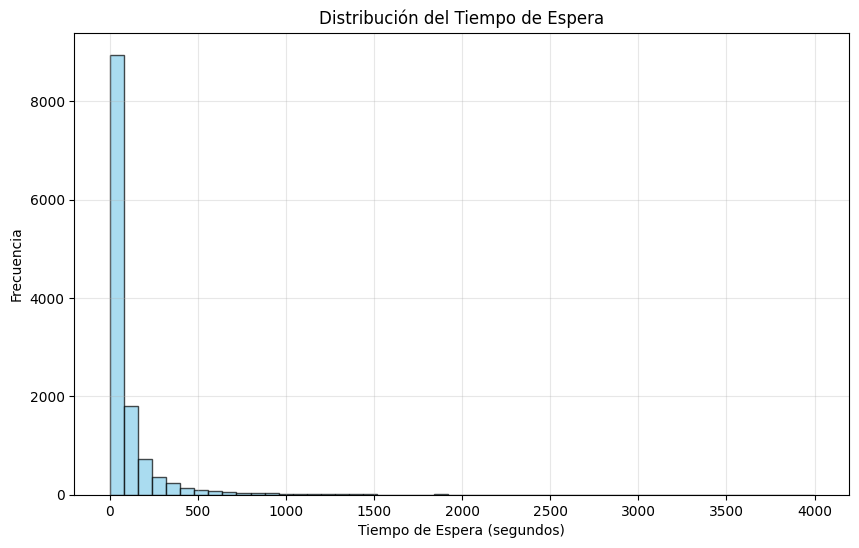

In [14]:
# creación de la columna referente al tiempo de espera entre las llamadas cliente - operador
telecom_dataset_clean['wait_time'] = telecom_dataset_clean['total_call_duration'] - telecom_dataset_clean['call_duration']

# visualización de la columna 'wait_time'
print(telecom_dataset_clean[telecom_dataset_clean['direction'] == 'in']['wait_time'].describe())

# distribución del tiempo de espera de las llamadas entrantes en segundos
plt.figure(figsize=(10, 6))
plt.hist(telecom_dataset_clean[telecom_dataset_clean['direction'] == 'in']['wait_time'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución del Tiempo de Espera')
plt.xlabel('Tiempo de Espera (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

En el bloque de código anterior se visualiza una descripción y un histograma de distribución de la duración del tiempo de espera que tuvieron las llamadas entrantes a la empresa CallMeMaybe. Estos tiempos de espera fueron calculados mediante la resta de los valores de la columna total_call_duration menos los valores de la columna call_duration dando como resultado la columna wait_time y se realizó un filtro para visualizar solo las llamadas catalogadas como entrantes (direction = in)

Podemos notar que estos datos se encuentran sesgados hacia la derecha debido a la presencia de un valor atípico de 3998 segundos equivalente a 1.11 horas de tiempo de espera, este es un valor de carácter inaceptable para las métricas que se desean evaluar de los operadores que trabajan en la empresa.

A continuación se calcularán los percentiles 90, 95 y 99 para tener un mejor control y verificar que tan extremos son los valores dentro de la distribución observada de la columna wait_time para llamadas entrantes.

In [15]:
percentiles = [0.90, 0.95, 0.99]

# cálculo de percentiles del tiempo de espera de las llamadas
for i in percentiles:
  print(f"Percentil {i} de la columna 'wait_time': {telecom_dataset_clean['wait_time'].quantile(i).round(2)} segundos")

Percentil 0.9 de la columna 'wait_time': 659.0 segundos
Percentil 0.95 de la columna 'wait_time': 1234.5 segundos
Percentil 0.99 de la columna 'wait_time': 3495.4 segundos


Como se observa en el bloque de código anterior, se tiene que para el percentil 90 se cuentan tiempos de espera con duraciones de 658 segundos lo que equivale a casi 11 minutos, para el percentil 95 se tiene una duración del tiempo de espera de 1233.75 segundos que es equivalente a 20 minutos aproximadamente y para el percentil 99 se tiene una llamada con una duración del tiempo de espera de 3488.7 segundos lo que es equivalente a 58.1 minutos.

Los valores anteriormente descritos nos indican la existencia de llamadas entrantes que se demoraron más de 10 minutos en ser contestadas, no obstante, si se trata de evaluar la eficacia de los operadores, el que haya un tiempo de espera tan prolongado como 58 minutos ya es sería una alarma que indica que el operador no esta realizando su trabajo de una forma óptima.

Se debe realizar un capeo de los datos para mantenerlos dentro de rangos manejables que nos permitan evaluar el desempeño de los operadores en base al tiempo de espera que tuvieron sus llamadas entrantes y categorizarlos en posibles clases:
- Tiempo aceptable: 0-3 minutos
- Tiempo alto: 3-10 minutos
- Tiempo crítico: 10+ minutos

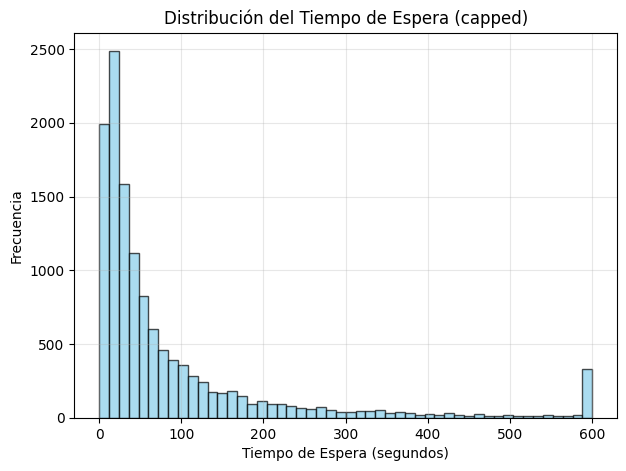


Cantidad de llamadas entrantes por encima del límite de 10 minutos de tiempo de espera: 321


In [16]:
limite_wait_time_aceptable = 600 # 600 segundos equivalen a 10 minutos

telecom_dataset_clean_capped = telecom_dataset_clean.copy()
# capeo del tiempo de espera
telecom_dataset_clean_capped['wait_time'] = np.where(telecom_dataset_clean_capped['wait_time'] > limite_wait_time_aceptable, limite_wait_time_aceptable, telecom_dataset_clean_capped['wait_time'])

# distribución del tiempo de espera en segundos de llamadas entrantes (cappeado)
plt.figure(figsize=(7,5))
plt.hist(telecom_dataset_clean_capped[telecom_dataset_clean_capped['direction'] == 'in']['wait_time'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución del Tiempo de Espera (capped)')
plt.xlabel('Tiempo de Espera (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

llamadas_outliers = len(telecom_dataset_clean[(telecom_dataset_clean['wait_time'] > limite_wait_time_aceptable) & (telecom_dataset_clean['direction'] == 'in')])
print(f'\nCantidad de llamadas entrantes por encima del límite de 10 minutos de tiempo de espera: {llamadas_outliers}')

En el bloque de código anterior se presenta el histograma de distribución de la duración del tiempo de espera que tuvieron las llamadas entrantes a los operadores con los datos capeados para que no superen el límite de 10 minutos de tiempo de espera, esto con el fín de contabilizar de mejor manera los operadores que tengan un alto tiempo de espera en sus llamadas entrantes. Como resultado, se capearon 321 registros de llamadas entrantes que superaron los 10 minutos de tiempo de espera.

### Llamadas perdidas por operador

En este siguiente apartado se tiene la intención de analizar el comportamiento de los operadores en base a sus llamadas perdidas siendo ésta la segunda métrica a considerar para evaluar el desempeño de los operadores.

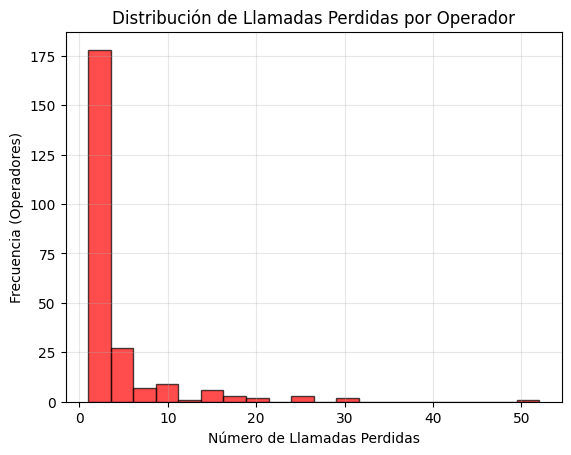

In [17]:
# Filtrado para llamadas entrantes perdidas
missed_calls = telecom_dataset_clean[
    (telecom_dataset_clean['direction'] == 'in') &
    (telecom_dataset_clean['is_missed_call'] == True)
]

# Contar llamadas perdidas por operador
missed_calls_by_operator = missed_calls.groupby('operator_id')['calls_count'].sum()

# Histograma
plt.hist(missed_calls_by_operator, bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribución de Llamadas Perdidas por Operador')
plt.xlabel('Número de Llamadas Perdidas')
plt.ylabel('Frecuencia (Operadores)')
plt.grid(True, alpha=0.3)
plt.show()

El histograma anterior revela que una gran parte de los operadores tuvieron 10 o menos llamadas perdidas del total de estas que recibieron. Pero para definir la eficacia de los trabajadores, hay que conteplar las llamdas perdidas que tuvieron en base al total de llamadas que recibieron, para ello se calculará la tasa de llamadas perdidas con el fin de tener una mejor noción de la eficacia de los operadores.

Para tener mejor conocimeinto de la cantidad de operadores que trabajan en la empresa CallMeMaybe, se realizará un conteo de valores unicos presentes en la columna operator_id del dataframne telecom_dataset_clean.

Posteriormente se calculará la cantidad de llamadas entrantes que tuvo cada operador.

In [18]:
print(f'Cantidad de operadores que trabajan dentro de la empresa CallMeMaybe: {telecom_dataset_clean["operator_id"].nunique()}')

llamadas_recibidas = telecom_dataset_clean[telecom_dataset_clean['direction'] == 'in'].groupby('operator_id')['calls_count'].sum()
print(f'Cantidad de operadores que recibieron llamadas entrantes : {len(llamadas_recibidas)}')

print('\nLlamadas recibidas por operador:')
print(llamadas_recibidas.sort_values(ascending= False))

Cantidad de operadores que trabajan dentro de la empresa CallMeMaybe: 1092
Cantidad de operadores que recibieron llamadas entrantes : 754

Llamadas recibidas por operador:
operator_id
913938    4766
952948    3540
913942    2467
893804    2433
921318    2319
          ... 
953940       1
902238       1
913984       1
952916       1
947612       1
Name: calls_count, Length: 754, dtype: int64


En el anterior bloque de código se muestra que 1092 operadores son los que trabajan dentro de la empresa CallMeMaybe pero solo 754 son los que recibieron llamadas entrantes, esto quiere decir que 338 trabajadores no recibieron este tipo de llamadas. Además también se muestra las llamadas entrantes que tuvo cada operador.

Una razón de esta diferencia es por la posible distribución de carga laboral con la que se organizan los operadores de la empresa, mientras que un grupo de operadores (754) recibe llamadas entrantes y tienen la necesidad de realizar llamadas salientes, estos operadores pueden repartir la cantidad de llamadas salientes a realizar con el otro grupo de operadores (338) para no frenar la oportunidad de recibir las llamadas entrantes futuras, de este modo se disminuye el tiempo de espera para las llamadas entrantes.

In [19]:
print(f'Cantidad de operadores que tuvieron llamadas perdidas: {len(missed_calls_by_operator)}')
print(missed_calls_by_operator.sort_values(ascending=False))

Cantidad de operadores que tuvieron llamadas perdidas: 239
operator_id
913942    52
940588    30
944226    30
885890    26
944216    24
          ..
924546     1
924928     1
924930     1
924948     1
969272     1
Name: calls_count, Length: 239, dtype: int64


En el bloque de código anterior se tiene que de los 754 operadores que recibieron llamadas, 239 de estos tuvieron llamadas perdidas, y se observa en el objeto series anterior que hubo ciertos operadores que tuvieron una gran cantidad de llamadas perdidas.

Como se mencionó antes, ahora se calculará la tasa de llamadas perdidas que tuvieron los 239 operadores y estas tasas se visualizarán en un histograma de distribución para ver cual es la presencia y la magnitud de estas.

#### Tasa de llamadas perdidas

     operator_id  lost_call_rate
641       948756          100.00
185       904344           75.00
287       913886           50.00
210       906392           38.89
698       957922           33.33
..           ...             ...
301       914848            0.00
302       914870            0.00
304       915614            0.00
305       915958            0.00
753       973286            0.00

[754 rows x 2 columns]



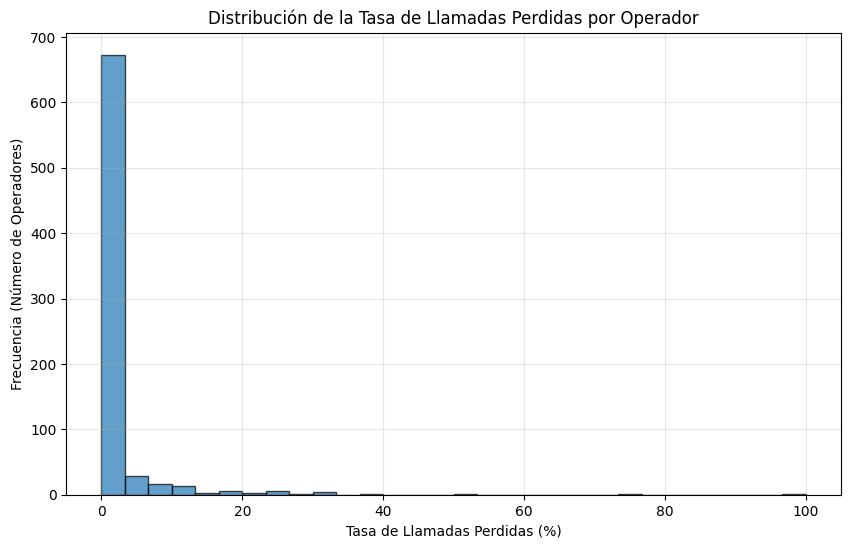

Estadísticas de la tasa de llamadas perdidas:
Media: 1.76%
Mediana: 0.00%
Máximo: 100.00%
Mínimo: 0.00%


In [20]:
# calculo de la tasa de llamadas perdidas
missed_calls_rate = missed_calls_by_operator / llamadas_recibidas
missed_calls_rate = missed_calls_rate.fillna(0).reset_index()
missed_calls_rate.columns = ['operator_id', 'lost_call_rate']

# Convertir a porcentajes
missed_calls_rate_percent = missed_calls_rate.copy()
missed_calls_rate_percent['lost_call_rate'] = (missed_calls_rate['lost_call_rate'] * 100).round(2)
print(missed_calls_rate_percent.sort_values(by= 'lost_call_rate', ascending=False))
print()

# histograma de la tasa de llamadas perdidas
plt.figure(figsize=(10, 6))
plt.hist(missed_calls_rate_percent['lost_call_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la Tasa de Llamadas Perdidas por Operador')
plt.xlabel('Tasa de Llamadas Perdidas (%)')
plt.ylabel('Frecuencia (Número de Operadores)')
plt.grid(True, alpha=0.3)
plt.show()

print("Estadísticas de la tasa de llamadas perdidas:")
print(f"Media: {missed_calls_rate_percent['lost_call_rate'].mean():.2f}%")
print(f"Mediana: {missed_calls_rate_percent['lost_call_rate'].median():.2f}%")
print(f"Máximo: {missed_calls_rate_percent['lost_call_rate'].max():.2f}%")
print(f"Mínimo: {missed_calls_rate_percent['lost_call_rate'].min():.2f}%")

En el histograma de distribución anterior se tiene que la gran mayoría de los operadores no tuvieron llamadas perdidas, no obstante, si existe la presencia de diversos grupos de operadores que si cuentan con una tasa de llamadas perdidas, que a medida que esta va creciendo, el tamaño de los grupos de operadores pertenecientes a esa tasa va disminuyendo, por lo que los operadores que se encuentran por encima del 10% de la tasa de llamadas perdidas sería el grupo de operadores en los que hay que poner mayor atención para definir por medio de las circunstancias si estos desempeñan un trabajo ineficiente.

Cabe mencionar que no por que exista una media de 1.76% de tasa de llamadas perdidas quiere decir que todos los operadores no contestaron alguna llamada, esta métrica es ponderada en base a todos los operadores, y la presencia de operadores con una tasa de llamadas perdidas alta hace que la media se vea afectada aún cuando la mayoría de los operdaores no tuvo llamdas perdidas.

In [21]:
percentiles = [0.25, 0.50, 0.75, 0.95, 0.99]
print("Percentiles de la tasa de llamadas perdidas:")
for p in percentiles:
    print(f"Percentil {int(p*100)}: {missed_calls_rate_percent['lost_call_rate'].quantile(p):.2f}%")

Percentiles de la tasa de llamadas perdidas:
Percentil 25: 0.00%
Percentil 50: 0.00%
Percentil 75: 0.68%
Percentil 95: 9.14%
Percentil 99: 29.93%


Con el cálculo de los percentiles anteriores se brinda una mejor idea de entre que rangos se encuentran las tasas de llamadas perdidas de los operadores, teniendo como resultado:

 - El 50% de los operadores que recibieron llamadas no tuvieron llamadas perdidas
 - Aproximadamente un 25% de los operadores su porcenteje de llamadas perdidas no superó el 1% del total de llamadas que recibieron.
 - Aproximadamente un 20% de los operadores que recibieron llamadas, su tasa de llamadas perdidas se encontró entre el 1% y el 10%.
 - El 5% restante de los operadores tuvieron una tasa de llamadas perdidas superior al 10%.

 Con lo anterior descrito, podemos decir que el sector de operadores en el que hay que centrarse e identificar las razones por las que su tasa de llamadas perdidas fue tan elevada (superior al 10%) es en un 5% de los operadores que trabajan en la empresa CallMeMaybe y que recibieron llamadas entrantes.

#### Operadores con más del 10% de llamadas perdidas

In [22]:
# obtención de los operadores con una tasa de llamadas perdidas sueperior al 10%
operator_10_plus_lostcallrate = missed_calls_rate_percent[missed_calls_rate_percent['lost_call_rate'] > 10.00]['operator_id']
print('Cantidad de operadores que tienen una tasa de llamadas perdidas superior al 10%: ', operator_10_plus_lostcallrate.nunique())
print()

critic_operators = telecom_dataset_clean[telecom_dataset_clean['operator_id'].isin(operator_10_plus_lostcallrate)]
print(critic_operators)

Cantidad de operadores que tienen una tasa de llamadas perdidas superior al 10%:  33

       user_id                      date direction internal  operator_id  \
2219    166407 2019-08-20 00:00:00+03:00       out    False       888532   
2220    166407 2019-08-20 00:00:00+03:00       out     True       888532   
2221    166407 2019-08-26 00:00:00+03:00        in     True       888532   
2223    166407 2019-09-09 00:00:00+03:00       out     True       888532   
2224    166407 2019-09-10 00:00:00+03:00        in    False       888532   
...        ...                       ...       ...      ...          ...   
53895   168606 2019-11-09 00:00:00+03:00       out    False       957922   
53896   168606 2019-11-10 00:00:00+03:00       out     True       957922   
53897   168606 2019-11-10 00:00:00+03:00       out     True       957922   
53898   168606 2019-11-11 00:00:00+03:00       out     True       957922   
53899   168606 2019-11-15 00:00:00+03:00       out     True       957922   

 

En el anterior bloque de código se visualizan los registros pertenecientes a los operadores que tuvieron una tasa de llamadas perdidas superior al 10%, donde realmente no sen aprecia algun patrón aparente entre cada registro.

A continuación se revisarán los datos de las columnas direction y is_missed_call de forma individual para tratar de indentificar una razón del porque 33 operadores tuvieron más del 10% en su tasa de llamadas perdidas.

In [23]:
print(critic_operators.groupby('direction')['calls_count'].sum())
print()
print(critic_operators.groupby('is_missed_call')['operator_id'].count())

direction
in      889
out    1554
Name: calls_count, dtype: int64

is_missed_call
False    527
True     274
Name: operator_id, dtype: int64


Lo que se puede observar en el bloque de código anterior es una serie de contabilizaciones donde se tiene que hubo casi el doble de llamadas salientes que llamadas entrantes, por lo que es una posible causa de las llamadas perdidas existentes, al no tener flexibilidad de tiempo entre las llamadas salientes y entrantes, los operadores no pueden colgar sus llamadas para poder contestar otras.

Otro aspecto importante es que estos operadores críticos tuvieron 801 registros de llamadas de las cuales 274 fueron categorizadas como perdidas, siendo un 34.2% del total de registros que indican las llamadas que desarrollaron estos operadores.

In [24]:
# Tabla cruzada para ver llamadas perdidas por dirección (tasa > al 10%)
cross_table = critic_operators.groupby(['direction', 'is_missed_call']).size().unstack(fill_value=0)
print(cross_table)

# Calcular totales por dirección
totals_by_direction = critic_operators.groupby('direction').size()
print("\nTotal de registros de llamadas por dirección:")
print(totals_by_direction)

# Calcular llamadas perdidas por dirección
missed_by_direction = critic_operators[critic_operators['is_missed_call'] == True].groupby('direction').size()
print("\nRegistros de llamadas perdidas por dirección:")
print(missed_by_direction)

# Calcular las tasas (porcentajes)
missed_rate_by_direction = (missed_by_direction / totals_by_direction * 100).round(2)
print("\nTasa de llamadas perdidas por dirección (%):")
print(missed_rate_by_direction)

is_missed_call  False  True 
direction                   
in                276     74
out               251    200

Total de registros de llamadas por dirección:
direction
in     350
out    451
dtype: int64

Registros de llamadas perdidas por dirección:
direction
in      74
out    200
dtype: int64

Tasa de llamadas perdidas por dirección (%):
direction
in     21.14
out    44.35
dtype: float64


En el anterior bloque de código se tiene que un 44.35% de los registros de las llamadas salientes que realizaron este grupo crítico de operadores fueron llamadas perdidas, es decir que de 451 llamadas salientes que realizaron solo 251 se completaron.

Para las llamadas entrantes tuvieron una tasa de llamadas perdidas del 21.08%, lo que significa que de 351 registros de llamadas entrantes, se completaron con éxito 277.

Una posible razón del porque la tasas de llamadas perdidas tanto entrantes como salientes pueden deberse a varios aspectos, por ejemplo:

- problemas técnicos.
- horarios inadecuados.
- listas de contactos desactualizadas.

No obstante, estos son los operadores que entran en la clasificación de ineficientes.

#### Operadores con menos del 10% de llamadas perdidas

In [25]:
operator_0_lostcallrate = missed_calls_rate_percent[(missed_calls_rate_percent['lost_call_rate'] < 10.00)]['operator_id']
print('Cantidad de operadores que tienen una tasa de llamadas perdidas del 0% la 10%: ', operator_0_lostcallrate.nunique())
print()
good_operators = telecom_dataset_clean[telecom_dataset_clean['operator_id'].isin(operator_0_lostcallrate)]
print(good_operators)

Cantidad de operadores que tienen una tasa de llamadas perdidas del 0% la 10%:  718

       user_id                      date direction internal  operator_id  \
1       166377 2019-08-05 00:00:00+03:00       out     True       880022   
2       166377 2019-08-05 00:00:00+03:00       out     True       880020   
3       166377 2019-08-05 00:00:00+03:00       out     True       880020   
4       166377 2019-08-05 00:00:00+03:00       out    False       880022   
5       166377 2019-08-05 00:00:00+03:00       out    False       880020   
...        ...                       ...       ...      ...          ...   
53872   168601 2019-11-26 00:00:00+03:00        in    False       952914   
53877   168601 2019-11-27 00:00:00+03:00        in    False       952914   
53878   168601 2019-11-27 00:00:00+03:00       out    False       952914   
53879   168601 2019-11-27 00:00:00+03:00       out    False       952914   
53881   168601 2019-11-28 00:00:00+03:00       out    False       952914   

  

En el bloque de código anterior, al igual que con los operadores que tienen una tasa de llamadas perdidas superior al 10%, en este caso se visualizan los registros pertenenecientes a los operadores que tuvieron una tasa de llamadas perdidas menor al 10% del total de llamadas que recibieron y los regsitros presentan bastantes diferencias entre si, pero al priorizar las columnas `direction` y `is_missed_call`, notamos que ningun registro con el valor `in` en la columna `direction` tiene un valor `True` en la columna `is_missed_call`.

Del mismo modo, se analizaran las columnas `direction` y `is_missed_call` en forma agrupada por número de llamadas y por identificador de operador respectivamente, para tener una mejor noción de como se comportaron estos operadores conr especto a las llamadas entrantes.

In [26]:
print(good_operators.groupby('direction')['calls_count'].sum())
print()
print(good_operators.groupby('is_missed_call')['operator_id'].count())

direction
in      92813
out    342796
Name: calls_count, dtype: int64

is_missed_call
False    22853
True     10230
Name: operator_id, dtype: int64


En el bloque de código anterior se tiene, con respecto a la columna `direction` hubo una cantidad notablemente superior de llamadas salientes con respecto a las entrantes, siendo un número 3.7 veces más grande.

Con respecto a la columna `is_missed_call` se tiene que hubo un total de 10231 registros de llamadas perdidas (30.87%), lo que esto sugiere que estos operadores posiblemente realizaron llamadas salientes que los clientes no pudieron contestar. También se observa que se tiene un total de 22906 registros de llamadas ejecutadas con éxito (69.12%).

Teniendo los datos anteiores se pude especular que algunos operdadores realizaron diversas llamadas al día (tanto entrantes-salientes como internas-externas) de las cuales algunas fueron realizadas con éxito mientras que otros pudieron realizar llamadas con una gran cantidad de intentos pero sin lograr cumplir con el propósito de sus llamadas.

A continuación se presenta una mejor descripción de las llamadas desarrolladas por los operadores con una tasa de llamadas perdidas menor al 10%.

In [27]:
# Tabla cruzada para ver llamadas perdidas por dirección (tasa < al 10%)
cross_table = good_operators.groupby(['direction', 'is_missed_call']).size().unstack(fill_value=0)
print(cross_table)

# Calcular totales por dirección
totals_by_direction = good_operators.groupby('direction').size()
print("\nTotal de llamadas por dirección:")
print(totals_by_direction)

# Calcular llamadas perdidas por dirección
missed_by_direction = good_operators[good_operators['is_missed_call'] == True].groupby('direction').size()
print("\nLlamadas perdidas por dirección:")
print(missed_by_direction)

# Calcular las tasas (porcentajes)
missed_rate_by_direction = (missed_by_direction / totals_by_direction * 100).round(2)
print("\nTasa de llamadas perdidas por dirección (%):")
print(missed_rate_by_direction)

is_missed_call  False  True 
direction                   
in              11691    606
out             11162   9624

Total de llamadas por dirección:
direction
in     12297
out    20786
dtype: int64

Llamadas perdidas por dirección:
direction
in      606
out    9624
dtype: int64

Tasa de llamadas perdidas por dirección (%):
direction
in      4.93
out    46.30
dtype: float64


Con el anterior bloque de código se tiene que del total de llamadas entrantes que recibieron estos operadores solo el 4.91% de estos registros fueron llamadas perdidas lo que se traduce en que de 12351 registros de llamadas entrantes, 11744 se realizaron con éxito.

Pero para las llamadas salientes es otra historia ya que se tiene que el 46.3% de los registros de todas las llamadas salientes que realizaron estos operadores (20786), 9624 llamadas no se lograron completar, siendo esto un refuerzo a la hipótesis de que algunos clientes no respondieron a las llamadas provinientes de los operadores.

Cabe mencionar que algunas de las llamadas salientes pueden ser internas, por lo que sería una posibilidad de que incluso dentro de la misma empresa, algunos operadores no contesten las llamadas que reciben por parte de sus compañeros de trabajo.

### Llamadas salientes por operador

En esta parte se busca analizar la distribución de las llamadas salientes por operador, debido a que es considerado un aspecto de ineficiencia si estos realizan pocas llamadas salientes.

             calls_count
operator_id             
901884               228
887276               198
901880               194
885876               193
905538               191
...                  ...
882478                 1
924572                 1
949420                 1
941816                 1
891250                 1

[882 rows x 1 columns]


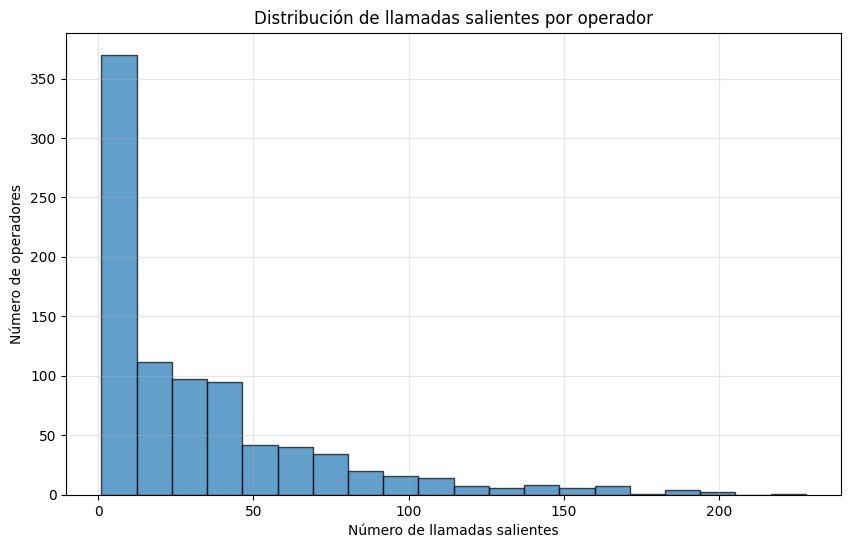

In [28]:
llamadas_salientes = telecom_dataset_clean[telecom_dataset_clean['direction'] == 'out']

llamadas_salientes_por_operador = llamadas_salientes.groupby('operator_id').agg({'calls_count': 'count'})
print(llamadas_salientes_por_operador.sort_values(by= 'calls_count', ascending= False))

plt.figure(figsize=(10, 6))
plt.hist(llamadas_salientes_por_operador, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Número de llamadas salientes')
plt.ylabel('Número de operadores')
plt.title('Distribución de llamadas salientes por operador')
plt.grid(True, alpha=0.3)
plt.show()

En el anterior bloque de código se presenta un conteo del número de llamadas salientes realizadas por operador y un histograma que ilustra la distribución del número de operadores que realizaron cierta cantidad de llamadas salientes.

Se observa un pico en el primer contenedor del histograma, y en el conteo de las llamadas por operador se tiene que una gran cantidad de operadores realizaron menos de 10 llamadas salientes aproximadamente, este es un indicador clave de la ineficiencia de estos operdaores.

A continuación se calculan algunas estadísticas para averiguar métricas clave del comportamiento de los operadores que realizaron llamadas salientes.

In [29]:
print("== Estadísticas de llamadas salientes por operador ==")
print(f"Media: {float(llamadas_salientes_por_operador.iloc[0].mean()):.2f}")
print(f"Mediana: {float(llamadas_salientes_por_operador.iloc[0].median()):.2f}")

total_operadores = len(llamadas_salientes_por_operador)
print(f"Total de operadores: {total_operadores}")
print(f"Operadores con más de 10 llamadas salientes: {(llamadas_salientes_por_operador['calls_count'] > 10).sum()}")
print(f"Operadores con menos de 10 llamadas: {(llamadas_salientes_por_operador['calls_count'] < 10).sum()}")
porcentaje_bajo_rendimiento = ((llamadas_salientes_por_operador['calls_count'] < 10).sum() / total_operadores) * 100
print(f"Porcentaje del total de operadores con menos de 10 llamadas: {porcentaje_bajo_rendimiento:.1f}%")

== Estadísticas de llamadas salientes por operador ==
Media: 96.00
Mediana: 96.00
Total de operadores: 882
Operadores con más de 10 llamadas salientes: 536
Operadores con menos de 10 llamadas: 321
Porcentaje del total de operadores con menos de 10 llamadas: 36.4%


En el bloque de código anterior se presetan métricas que son de grán interés para comprender cuál es el comportamiento de los operadores en lo que respecta a las llamadas salientes que estos realizaron.

Tenemos que como media aritmética una cantidad promedio de 96 llamadas salientes realizadas. Esta métrica no tiene un verdadero impácto de interés, ya que una hubo un total de 321 operadores que realizaron menos de 10 llamadas salientes, lo que equivale al 36.4% del total de operadores que realizaron llamadas salientes, por lo que no se puede asumir que cada operador realizó en promedio 96 llamadas salientes.

Tenemos que la cantidad de operadores que realizaron más de 10 llamadas salientes fue de 536, un indicador de que hubo operadores que realizaron un trabajo aceptable dentro de la empresa. No obstante, el que haya un 36.4% de operadores con menos de 10 llamadas no supone un punto positivo a considerar su eficiencia.

Para lograr entender de mejor manera el impacto que tienen estas métricas en el periodo de tiempo en el que fueron extraídos estos datos, se calculará el rango de fechs en el que estos datos fueron extraídos.

In [30]:
fecha_min = telecom_dataset_clean['date'].min()
fecha_max = telecom_dataset_clean['date'].max()

print(f'Primer fecha de la extracción de datos : {fecha_min}')
print(f'Última fecha de la extracción de datos : {fecha_max}')

# diferencia de días entre la última fecha y la primera
diferencia = fecha_max - fecha_min

print(f"Cantidad de días correspondiente al periodo de extracción de datos: {diferencia.days}")

Primer fecha de la extracción de datos : 2019-08-02 00:00:00+03:00
Última fecha de la extracción de datos : 2019-11-28 00:00:00+03:00
Cantidad de días correspondiente al periodo de extracción de datos: 118


Con el anterior tenemos que el periodo de tiempo en el que los datos de las llamadas desarrolladas por los operadores van desde el 2 de agosto del 2019 hasta el 28 de noviembre dle 2019, siendo un total de 118 días que se aproxima a casi 4 meses de trabajo.

Debido a esto, se debe considerar un umbral mínimo de llamadas salientes por operador en lo que respecta a los 118 días en que es evaluada su eficiencia.

A continuación se calcula el porcentaje de operadores con menos de 10, 30 y 50 llamadas salientes realizadas en el periodo de 118 días, con el fin de definir el umbral mínimo requerido de llamadas salientes para identificar de mejor manera la cantidad de operadores que tienen una mayor área de oportunidad en lo que respecta a las llamadas salientes realizadas por estos.

In [31]:
umbral_de_llamadas_salientes = [10, 30, 50]

for i in umbral_de_llamadas_salientes:
    print(f"Operadores con menos de {i} llamadas: {(llamadas_salientes_por_operador['calls_count'] < i).sum()} ({((llamadas_salientes_por_operador['calls_count'] < i).sum() / total_operadores * 100):.1f}%)")

Operadores con menos de 10 llamadas: 321 (36.4%)
Operadores con menos de 30 llamadas: 533 (60.4%)
Operadores con menos de 50 llamadas: 688 (78.0%)


Como se observa en el bloque de código anterior, notamos que con un umbral de menos de 30 llamadas salientes realizadas tenemos un 60.4% del total de operadores que realizaron este tipo de llamadas.

Este es un buen umbral para definir la eficiencia de los operadores debido a que realizar menos de 30 llamadas en casi 4 meses supone un aspecto de ineficiencia en su labor de realizar llamadas a nombre de sus clientes o a sus compañeros de trabajo de ser necesario, y es una posible área de oportunidad investigar las razones por las que estos operadores realizaron menos de 30 llamadas cuando hay un 39.6% de operadores que realizaron más de 30 llamadas salientes.

## Paso 3.1. Identificación de operadores ineficientes

### Operadores ineficientes

Anteriormente definimos las métricas principales que nos ayudarán a determinar la eficiencia de los operadores que en cuestión de:

Tiempo de espera de las llamadas entrantes.
Llamadas perdidas que tuvieron.
La cantidad de llamadas salientes que realizaron.
Tenemos que los operadores menos eficientes son los que:

El tiempo de espera de sus llamadas entrantes superó los 10 minutos.
Tuvieron llamadas perdidas superiores al 10% del total de llamadas entrantes que recibieron.
Realizaron menos de 30 llamadas salientes.
A continuación se realizará un filtrado para definir cuales y cuantos operadores pertenecen a los anteriores grupos descritos.

In [32]:
# operadores con mayor tiempo de espera
operadores_ineficientes_wait_time = telecom_dataset_clean_capped[(telecom_dataset_clean_capped['wait_time'] == limite_wait_time_aceptable) & (telecom_dataset_clean_capped['direction'] == 'in')]['operator_id'].astype('int').unique()
print(operadores_ineficientes_wait_time)
print(f'Cantidad de operadores que superan los 10 minutos de tiempo de espera en sus llamadas entrantes: {len(operadores_ineficientes_wait_time)}')
print()

# operadores con mayor tasa de llamadas perdidas
print(operator_10_plus_lostcallrate.unique().astype('int'))
print(f'Cantidad de operadores con una tasa de llamadas perdidas superior al 10% : {len(operator_10_plus_lostcallrate.unique())}')
print()

# operadores con menor cantidad de llamadas salientes
llamadas_salientes_operadores_ineficientes = llamadas_salientes_por_operador[llamadas_salientes_por_operador['calls_count'] < 30].reset_index()
print(llamadas_salientes_operadores_ineficientes['operator_id'].unique().astype('int'))
print(f"Cantidad de operadores con menos de 30 llamadas salientes realizadas : {len(llamadas_salientes_operadores_ineficientes['operator_id'].unique())}")

[882686 882690 902532 906680 908958 893402 906404 906406 906410 906408
 923526 913938 913942 906070 906076 911310 919554 919552 921818 919794
 919790 919792 944228 944210 919166 919204 919206 919164 921318 931458
 921306 969272 944226 939762 958460 939370 938414 940630 940588 954650]
Cantidad de operadores que superan los 10 minutos de tiempo de espera en sus llamadas entrantes: 40

[884408 888406 888532 890228 894230 894232 894614 897872 904344 905300
 905862 906392 906412 910226 911102 913886 918888 919896 924936 926872
 928382 930242 934098 937368 937432 937898 941844 944216 944226 948756
 957922 959312 964510]
Cantidad de operadores con una tasa de llamadas perdidas superior al 10% : 33

[880020 880240 881278 882478 882688 883018 883898 884402 884406 884408
 885682 886146 887280 887992 888406 888536 888538 888540 888868 890226
 890232 890234 890582 891156 891192 891250 891252 891744 891746 891824
 891908 891918 891946 891970 891976 892530 892534 892536 892538 892798
 892800 893172 

En el anterior bloque de código se muestran los tres grupos en lo que se define un operador como ineficiente.

Para tener un solo listado donde se encuentren los operadores que cumplan con almenos uno de los criterios de ineficiencia se elaborarán sets para generar un nuevo listado que combine los listados de cada grupo, obteniendo como resultado todos los operadores que serán los categorizados como ineficientes.

In [33]:
# sets de cada grupo
set1 = set(operadores_ineficientes_wait_time)
set2 = set(operator_10_plus_lostcallrate.unique().astype('int'))
set3 = set(llamadas_salientes_operadores_ineficientes['operator_id'].unique().astype('int'))

print(f"Unión de los 3 criterios: {len(set1 | set2 | set3)} operadores")

Unión de los 3 criterios: 569 operadores


Como resultado del anterior bloque de código tenemos que 569 operadores son los que cumplen con almenos 1 de los criterios de ineficiencia, por lo que a estos operadores hay que dedicarles un estudio más profundo del porque generaron esas métricas que los categorizó de esa manera.

A continuación se presenta el listado de los operadores ineficientes y el total de estos.

In [34]:
# unión de los sets de operadores y conteto del total de operadores ineficientes
operadores_ineficientes = list(set1 | set2 | set3)
operadores_ineficientes_clean = np.array(operadores_ineficientes).astype('int').tolist()
print(operadores_ineficientes_clean)
print(f"Operadores ineficientes totales: {len(operadores_ineficientes_clean)}")

[919552, 882688, 882690, 919554, 937984, 899076, 897030, 958470, 954376, 958472, 954378, 954380, 958478, 958480, 935956, 966686, 888868, 938022, 915504, 901178, 964666, 913474, 944210, 905300, 938070, 944216, 938072, 938074, 921592, 905308, 929884, 938078, 942174, 938080, 944226, 933986, 944228, 921594, 915558, 964712, 933996, 960620, 964716, 921596, 934000, 944246, 903292, 960648, 909452, 952460, 952462, 903312, 952466, 960666, 915614, 960670, 960672, 960674, 950444, 917680, 958640, 917682, 958672, 934098, 932050, 921814, 905432, 921818, 919790, 919792, 907504, 919794, 893172, 932088, 905470, 905472, 905480, 954642, 891156, 946454, 954650, 895266, 934188, 891192, 973120, 883018, 952656, 917846, 919896, 962904, 944474, 944476, 917858, 919910, 936296, 891250, 891252, 901492, 917876, 954750, 917890, 936324, 895370, 930186, 940430, 940432, 950672, 940436, 932246, 946582, 940440, 940456, 940458, 940460, 938414, 944560, 960950, 940474, 930242, 932292, 940486, 913868, 932304, 901588, 893400,

## Paso 3.2. Análisis de la atención al cliente

### Análisis de los clientes - telecom_clients_clean

En este apartado se tiene la finalidad de estudiar el dataframe telecom_clients_clean para definir el como se encuentran organizados los datos de los clientes de la empresa y definir si los operadores que pertenecen a la categoría de ineficientes generarán un impacto de gran magnitud al atender a los clientes de CallMeMaybe.

In [35]:
print(telecom_clients_clean.head())
print(f"Cantidad de clientes: {len(telecom_clients_clean['user_id'].unique())}")

   user_id tariff_plan date_start
0   166713           A 2019-08-15
1   166901           A 2019-08-23
2   168527           A 2019-10-29
3   167097           A 2019-09-01
4   168193           A 2019-10-16
Cantidad de clientes: 732


En el anterior bloque de código se tiene que en total, son 732 clientes los que cuentan con el servicio de la empresa CallMeMaybe.

A continuación se pretende saber la cantidad de clientes pertenecientes a cada tarifa y ver si hay alguno de ellos que cuente con dos tarifas.

         count  nunique
user_id                
166373       1        1
166374       1        1
166375       1        1
166376       1        1
166377       1        1
------------------------------------------------------------------------------------------
Total de clientes: 732
Clientes con múltiples tarifas: 0
------------------------------------------------------------------------------------------


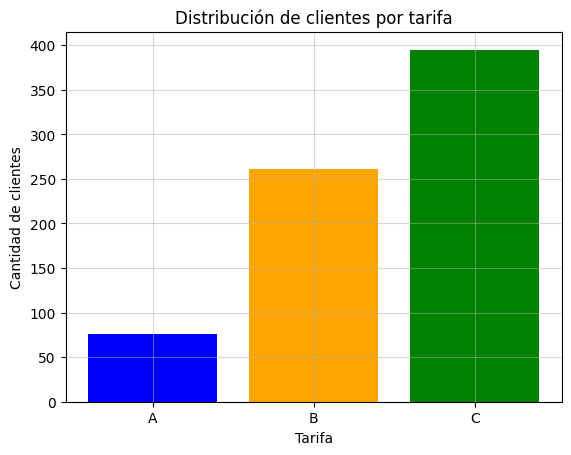

tariff_plan
A     76
B    261
C    395
Name: user_id, dtype: int64


In [36]:
# verificación de multitarifas por cliente
tarifas = telecom_clients_clean.groupby('user_id')['tariff_plan'].agg(['count', 'nunique'])
print(tarifas.head())
print('-'*90)

# conteo del total de clientes
print(f"Total de clientes: {len(telecom_clients_clean['user_id'].unique())}")

# filtrado para clientes con más de una tarifa
clientes_multiples_tarifas = tarifas[tarifas['nunique'] > 1]
print(f"Clientes con múltiples tarifas: {len(clientes_multiples_tarifas)}")
print('-'*90)

distribución_tarifas = telecom_clients_clean.groupby('tariff_plan')['user_id'].count()

colores = ['blue', 'orange', 'green']
plt.bar(distribución_tarifas.index, distribución_tarifas.values, color=colores)
plt.xlabel('Tarifa')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes por tarifa')
plt.grid(True, alpha=0.5)
plt.show()

print(telecom_clients_clean.groupby('tariff_plan')['user_id'].count())

Con el anterior bloque de código se demuestra que ninguno de los 732 clientes cuenta con más de dos tarifas y para la cantidad de clientes que pertenecen a cada tarifa se muestra que:

- La tarifa A: tiene 76 clientes
- La tarifa B: tiene 261 clientes
- La tarifa C: tiene 395 clientes

Debido a que no se cuenta con una información detallada sobre que tarifa es la más importante para la empresa, se asumirá que la tarifa A es la más importante porque represente a clientes potencialmente valiosos seguidos de la tarifa B y C con el mismo orden de prioridad.

#### Cohortes por antigüedad

En este apartado se tiene la intención de estuidar los clientes que inciaron su contratación con la empresa y ver a que tarifa pertenecen desde que comenzaron a ser clientes de CallMeMaybe.

In [37]:
# creación de la columna referente al mes de inicio
telecom_clients_clean['month_start'] = telecom_clients_clean['date_start'].dt.strftime('%Y-%m')

# Distribución por mes y plan
distribucion = telecom_clients_clean.groupby(['month_start', 'tariff_plan']).size()

print(distribucion)

month_start  tariff_plan
2019-08      A               26
             B               91
             C              141
2019-09      A               16
             B               77
             C              138
2019-10      A               34
             B               93
             C              116
dtype: int64


En el bloque de código anterior se muestra que a lo largo de tres meses en los que los clientes pagaron su tarifa, se tiene que:

- La tarifa A es la que menos contrataciones tuvo a lo largo de Agosto, Septiembre y Octubre del 2019.
- La tarifa C es la que más contrataciones tuvo en los tres meses mencionados anteriormente.
- La tarifa B se mantuvo con una media constante de contrataciones de entre 77 a 93 clientes.

In [38]:
# Unir ambos dataframes por user_id
datos_completos = telecom_dataset_clean.merge(
    telecom_clients_clean,
    on='user_id',
    how='inner'  # Solo clientes que aparecen en ambos datasets
)

print(datos_completos.head())
print(f'Total de llamadas desarrolladas: {len(datos_completos)}')

   user_id                      date direction internal  operator_id  \
0   166377 2019-08-05 00:00:00+03:00       out     True       880022   
1   166377 2019-08-05 00:00:00+03:00       out     True       880020   
2   166377 2019-08-05 00:00:00+03:00       out     True       880020   
3   166377 2019-08-05 00:00:00+03:00       out    False       880022   
4   166377 2019-08-05 00:00:00+03:00       out    False       880020   

   is_missed_call  calls_count  call_duration  total_call_duration  wait_time  \
0            True            3              0                    5          5   
1            True            1              0                    1          1   
2           False            1             10                   18          8   
3            True            3              0                   25         25   
4           False            2              3                   29         26   

  tariff_plan date_start month_start  
0           B 2019-08-01     2019-08  
1 

En el anterior dataframe se tiene la unión de los dos dataframes estudiados en este proyecto: `telecom_dataset_clean` y `telecom_clients_clean`, esto con el fin de estudiar los registros de una manera más eficaz posteriormente.

### Análisis de los registros desarrollados

En este apartado se busca estudiar los datos relacionados de los dos dataframes para poder describir de mejor manera el comportamiento de los registros y facilitar su análisis.

In [39]:
datos_completos['attention_month'] = datos_completos['date'].dt.strftime('%Y-%m')

print(datos_completos.head())
print('-'*90)
print(f'Cantidad de registros: {len(datos_completos)}')

   user_id                      date direction internal  operator_id  \
0   166377 2019-08-05 00:00:00+03:00       out     True       880022   
1   166377 2019-08-05 00:00:00+03:00       out     True       880020   
2   166377 2019-08-05 00:00:00+03:00       out     True       880020   
3   166377 2019-08-05 00:00:00+03:00       out    False       880022   
4   166377 2019-08-05 00:00:00+03:00       out    False       880020   

   is_missed_call  calls_count  call_duration  total_call_duration  wait_time  \
0            True            3              0                    5          5   
1            True            1              0                    1          1   
2           False            1             10                   18          8   
3            True            3              0                   25         25   
4           False            2              3                   29         26   

  tariff_plan date_start month_start attention_month  
0           B 2019-08-01 

En el bloque de código anterior se creó una columna extra denominada `attention_month` la cual será el indicador del mes en el que ese registro fue atendido por un operador de CallMeMaybe.

attention_month  tariff_plan
2019-08          A               215
                 B               935
                 C               320
2019-09          A              1068
                 B              2680
                 C              3179
2019-10          A              4226
                 B              4853
                 C              5395
2019-11          A              6704
                 B              5999
                 C              5917
dtype: int64


<Figure size 1200x600 with 0 Axes>

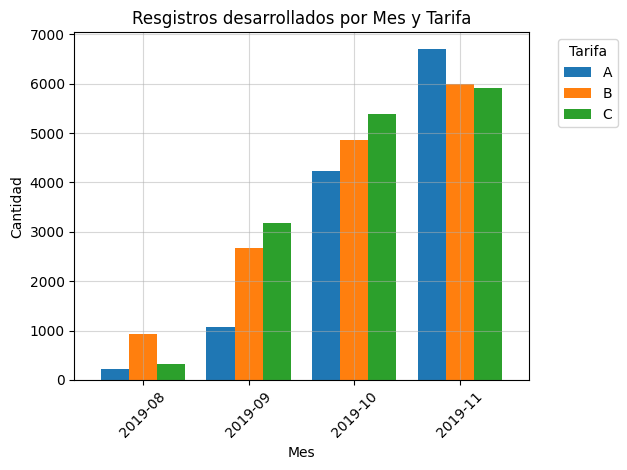

In [40]:
total_distribucion_clientes = datos_completos.groupby(['attention_month','tariff_plan']).size()

print(total_distribucion_clientes)

# grafico de registros atendidos por los operadores en el periodo de agosto a noviembre del 2019
plt.figure(figsize=(12, 6))
total_distribucion_clientes.unstack().plot(kind='bar', width=0.8)
plt.title('Resgistros desarrollados por Mes y Tarifa')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.5)
plt.legend(title='Tarifa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el bloque de código anterior se muestra la distribución de registros que fueron desarrollados por los operadores en el periodo de tiempo de agosto del 2019 a noviembre del 2019.

Se puede notar un gran incremento en los registros de manera lineal, donde una posible razón de esto es por un incremento en la demanda de los clientes de la empresa por realizar diversas llamadas en esa temporada acercándose al final del año.

Aunque esta distribución es efectiva para ver como se comportan los registros en el periodo de tiempo en el que los datos fueron recopilados, se necesita saber si los registros comprendidos entre esas fechas fueron desarrollados por los operadores eficientes e ineficientes y definir si supone un riesgo para la empresa en futuras ejecuciones de llamadas por parte de su grupo de operadores.

#### Clientes a salvo

En este apartado se busca filtrar los registros en donde los operadores que desarrollaron las llamadas no pertenecen al grupo de operadores ineficientes. Esto con el fin de cuantificar la cantidad de registros que no tienen riesgo alguno para la empresa en tiempos futuros.

In [41]:
# Filtrar solo clientes atendidos por operadores eficientes
clientes_seguros = datos_completos[
    ~datos_completos['operator_id'].isin(operadores_ineficientes_clean)
]

print(clientes_seguros.head())
print(f'Total de registros desarrollados por opreadores eficientes: {len(clientes_seguros)}')

    user_id                      date direction internal  operator_id  \
0    166377 2019-08-05 00:00:00+03:00       out     True       880022   
3    166377 2019-08-05 00:00:00+03:00       out    False       880022   
10   166377 2019-08-07 00:00:00+03:00       out    False       880028   
11   166377 2019-08-07 00:00:00+03:00       out    False       880026   
13   166377 2019-08-07 00:00:00+03:00       out    False       880026   

    is_missed_call  calls_count  call_duration  total_call_duration  \
0             True            3              0                    5   
3             True            3              0                   25   
10            True            1              0                   15   
11           False            1             21                   28   
13            True            1              0                   17   

    wait_time tariff_plan date_start month_start attention_month  
0           5           B 2019-08-01     2019-08         2019-08  


In [42]:
total_distribucion_clientes_seguros = clientes_seguros.groupby(['attention_month','tariff_plan']).size()

print(total_distribucion_clientes_seguros)

attention_month  tariff_plan
2019-08          A               179
                 B               739
                 C               239
2019-09          A               686
                 B              2068
                 C              2634
2019-10          A              2775
                 B              3559
                 C              4170
2019-11          A              5202
                 B              4141
                 C              4085
dtype: int64


En los anteriores dos bloques de código se muestran los registros que fueron desarrollados por operadores que no están en el grupo de ineficientes, por lo que estos registros (30477) que representan un 73.45% de los registros obtenidos en el periodo de agosto - noviembre del 2019, corresponden al trabajo óptimo que se espera por parte de los operadores ayudando a que la empresa CallMeMaybe mantenga una reputación positiva.

#### Clientes en riesgo

Como contraparte del apartado anterior, en este se busca cuantificar la cantidad de registros que fueron desarrollados por operadores que están en el grupo de ineficientes, con la finalidad de entender el impacto que tuvieron estos operadores sobre el total de registros comprendidos dentro del periodo de agosto - noviembre del 2019

In [43]:
# Filtrar solo clientes atendidos por operadores ineficientes
clientes_en_riesgo = datos_completos[
    datos_completos['operator_id'].isin(operadores_ineficientes_clean)
]

print(clientes_en_riesgo.head())
print(f'Total de clientes atendidos por opreadores ineficientes: {len(clientes_en_riesgo)}')

   user_id                      date direction internal  operator_id  \
1   166377 2019-08-05 00:00:00+03:00       out     True       880020   
2   166377 2019-08-05 00:00:00+03:00       out     True       880020   
4   166377 2019-08-05 00:00:00+03:00       out    False       880020   
5   166377 2019-08-05 00:00:00+03:00       out    False       880020   
6   166377 2019-08-06 00:00:00+03:00       out    False       881278   

   is_missed_call  calls_count  call_duration  total_call_duration  wait_time  \
1            True            1              0                    1          1   
2           False            1             10                   18          8   
4           False            2              3                   29         26   
5            True            8              0                   50         50   
6            True            3              0                   29         29   

  tariff_plan date_start month_start attention_month  
1           B 2019-08-01 

In [44]:
total_distribucion_clientes_riesgo = clientes_en_riesgo.groupby(['attention_month','tariff_plan']).size()

print(total_distribucion_clientes_riesgo)

attention_month  tariff_plan
2019-08          A                36
                 B               196
                 C                81
2019-09          A               382
                 B               612
                 C               545
2019-10          A              1451
                 B              1294
                 C              1225
2019-11          A              1502
                 B              1858
                 C              1832
dtype: int64


En los dos bloques de código anterior se presentan los registros desarrollados por los operadores ineficentes y su distribución por més de atención y por tarifa.

Se tienen un total de 11014 registros que corresponden al 26.54% del total de registros, siendo una cuarta del total de registros que puede representar un riesgo para la empresa en futuras llamadas que lleguen a desarrollar estos operadores.

#### Impacto

En este apartado se busca presentar los porcentajes de registros que fueron atendidos por operadores eficientes e ineficientes por mes y por tarifa con el fin de aclarar el impacto que tuvieron el desempeño de estos operadores en el periodo de tiempo en el que esta empresa desarrollo llamadas.

attention_month  tariff_plan
2019-08          A              83.26
                 B              79.04
                 C              74.69
2019-09          A              64.23
                 B              77.16
                 C              82.86
2019-10          A              65.66
                 B              73.34
                 C              77.29
2019-11          A              77.60
                 B              69.03
                 C              69.04
dtype: float64


<Figure size 1200x600 with 0 Axes>

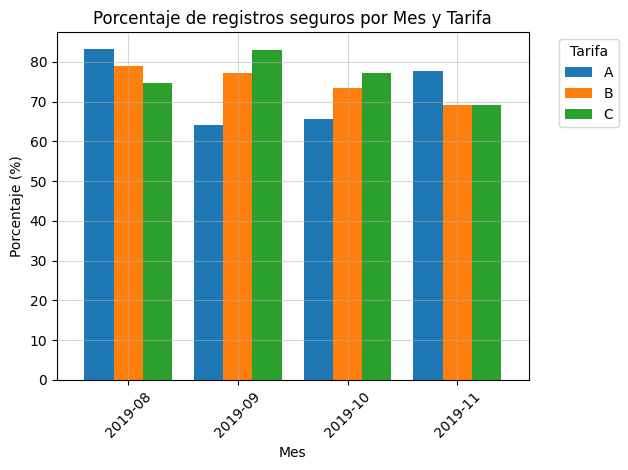

In [45]:
# porcentaje de clientes seguros por plan
porcentaje_seguro = (total_distribucion_clientes_seguros / total_distribucion_clientes) * 100

print(porcentaje_seguro.round(2))

# grafico de porcentajes de registros atendidos por operadores eficientes
plt.figure(figsize=(12, 6))
porcentaje_seguro.unstack().plot(kind='bar', width=0.8)
plt.title('Porcentaje de registros seguros por Mes y Tarifa')
plt.xlabel('Mes')
plt.ylabel('Porcentaje (%)')
plt.grid(True, alpha=0.5)
plt.legend(title='Tarifa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el bloque de código anterior se tiene el porcentaje de registros atendidos por operadores eficientes a lo largo de los meses de agosto a noviembre del año 2019 agrupados por tarifas.

Notamos que en el mes de agosto y septiembre, el porcentaje de estos registros se mantiene alto rondando valores dentro de un rango de 74% a 83% del total de registros, sin embargo se nota que en los meses de ocutbre y noviembre estos porcentajes disminuyeron, de modo que ahora se tienen porcentajes dentro de un rango de 65% a 77%, una disminución bastante notoria en la cantidad de registros atendidos por estos operadores.

attention_month  tariff_plan
2019-08          A              16.74
                 B              20.96
                 C              25.31
2019-09          A              35.77
                 B              22.84
                 C              17.14
2019-10          A              34.34
                 B              26.66
                 C              22.71
2019-11          A              22.40
                 B              30.97
                 C              30.96
dtype: float64


<Figure size 1200x600 with 0 Axes>

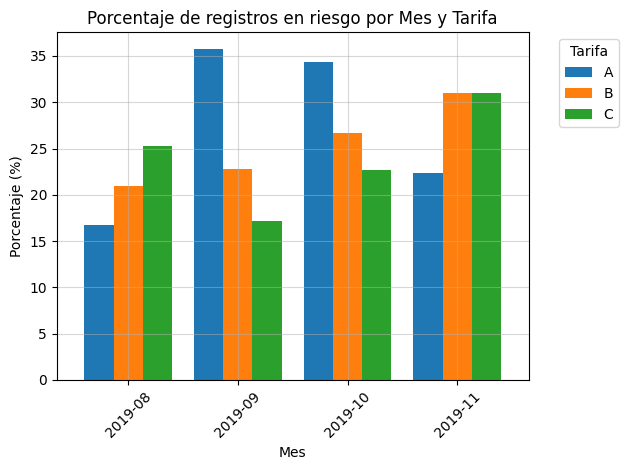

In [46]:
# Porcentaje de clientes en riesgo por plan
porcentaje_riesgo = (total_distribucion_clientes_riesgo / total_distribucion_clientes) * 100

print(porcentaje_riesgo.round(2))

# grafico de porcentajes de registros atendidos por operadores ineficientes
plt.figure(figsize=(12, 6))
porcentaje_riesgo.unstack().plot(kind='bar', width=0.8)
plt.title('Porcentaje de registros en riesgo por Mes y Tarifa')
plt.xlabel('Mes')
plt.ylabel('Porcentaje (%)')
plt.grid(True, alpha=0.5)
plt.legend(title='Tarifa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este apartado, caso contrario al anterior, se presentan los porcentajes de los registros atendidos por operadores ineficientes para cada grupo de tarifa en los cuatro meses mencionados anteriormente.

En este gráfico se nota que una gran parte de los registros correspondientes a los usuarios pretenecientes a la tarifa A fueron atendidos por operadores ineficientes, cosa que represeta un riesgo potencial a la empresa.

Además también se nota un aumento progresivo en los porcentajes de registros de los tres grupos conforme pasan los meses, siendo este otro factor de riesgo para la empresa por la posible perdida de clientes tras recibir un trato deficiente por parte de este grupo de operadores.

# Paso 4. Pruebas de hipótesis

En este apartado se busca respaldar estadísticamente hipótesis generadas a partir de los datos anteriormente obtenidos que definen a los operadores ineficientes con el objetivo de dar solidez a la estadítica y poder generar conclusiones acertadas.

## Hipótesis 1: Comprobar si existe diferencia entre el número de llamadas salientes entre operadores eficientes e ineficientes

Como primer hipótesis a comprobar se busca definir si existe una diferencia entre la cantidad de llamadas salientes realizadas por operadores eficientes e ineficientes, donde nuestra hipótesis nula y alternativa serán:

H0 : No hay una diferencia lo bastante significativa entre las llamadas salientes realizadas por operadores eficientes e ineficientes.

H1 : Si hay una diferencia lo bastante significativa para decir que la cantidad de llamadas salientes realizadas por operadores eficientes difiere de las realizadas por operadores ineficientes

Lo primero que hay que verificar es ver si la columna "calls_count" de nuestro dataframe telecom_dataset_clean se asemeja a lo que sería una distribución normal para poder definir posteriormente el tipo de prueba estadística a utilizar.

Para definir si estos datos se comportan bajo una distribución normal, se aplicará un test Shapiro-Wilk dado que este brinda una mejor estadística para muestras por debajo de 5000 registros, pero antes de aplicar esa prueba, primero se presentarán métricas clave de esta columna para tener una idea de que forma se comportan estos datos.

In [47]:
# calculo de métricas de llamadas salientes
valores_llamadas = llamadas_salientes_por_operador['calls_count']
print(f"Total de operadores: {len(valores_llamadas)}")
print(f"Estadísticas básicas:")
print(f"Media: {valores_llamadas.mean():.2f}")
print(f"Mediana: {np.median(valores_llamadas):.2f}")
print(f"Desviación estándar: {valores_llamadas.std():.2f}")

Total de operadores: 882
Estadísticas básicas:
Media: 32.67
Mediana: 19.00
Desviación estándar: 38.15


En el bloque de código anterior se presentan métricas clave para poder generar una base para definir bajo que distribución se pueden categorizar estos datos.

Se usó la variable `llamadas_salientes_por_operador` debido a que esta ya tenía los registros de las llamadas que tenían un valor "out" en la columna "direction".

Se tiene que 822 operadores son los que realizaron llamadas salientes.

La media de llamadas realizadas fueron de 32 y una mediana de 19 llamadas.

También se observa una desviación estándar bastate elevada a comparación de las dos métricas anteriores, suponiendo que si se tratara de una distribución normal y el total de datos se encontraría dentro del rango tres desviaciones estándar a la izquierda y derecha de la media, esto generaría números negativos hacia el lado izquierdo de la distribución, por lo que esto ayuda a establecer la base sólida de que no se trata de una distribución normal.

A continuación se presenta un diagrama de caja y bigotes que muestra otra forma de representar los registros correspondientes a la cantidad de llamadas salientes realizadas por los operadores.

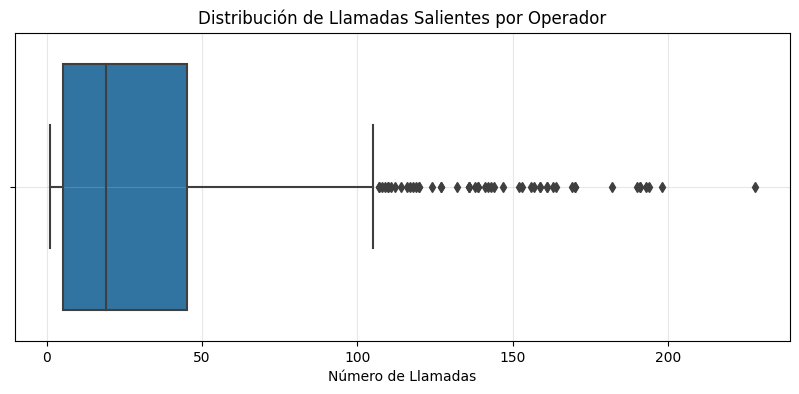

In [48]:
# creación de grafico de caja y bigotes para los datos de las llamadas salientes por operador
plt.figure(figsize=(10, 4))
sns.boxplot(x=valores_llamadas)
plt.title('Distribución de Llamadas Salientes por Operador')
plt.xlabel('Número de Llamadas')
plt.grid(True, alpha=0.3)
plt.show()

Nuevamente, vemos que hay datos atípicos muy a la derecha sobrepasando valor máximo y el rango intercuartílico por más de 1.5 veces, nuevamente asegurando de que estos datos no se encuentran bajo una distribución normal.

Ahora se procede con el test de Shapiro-Wilk para terminar de definir bajo que distribución se encuentran estos datos.

In [49]:
# función para ejecutar un test Shapiro-Wilk
def shapiro_method(array):
  # Prueba de Shapiro-Wilk
  shapiro_stat, shapiro_p = st.shapiro(array)

  print("=== PRUEBA DE NORMALIDAD ===")
  print(f"Shapiro-Wilk estadístico: {shapiro_stat:.4f}")
  print(f"p-valor: {shapiro_p:.6f}")
  print(f"Nivel de significancia: 0.05")

  if shapiro_p < 0.05:
    print("❌ RECHAZAMOS H0: Los datos NO siguen distribución normal")
  else:
    print("✅ NO RECHAZAMOS H0: Los datos podrían seguir distribución normal")

In [50]:
shapiro_method(valores_llamadas)

=== PRUEBA DE NORMALIDAD ===
Shapiro-Wilk estadístico: 0.7824
p-valor: 0.000000
Nivel de significancia: 0.05
❌ RECHAZAMOS H0: Los datos NO siguen distribución normal


Al aplicar el test de Shapiro-Wilk tenemos como resutlado de que los valores de las llamadas salientes realizadas por los operadores no siguen una distribución normal, con esto podemos definir que prueba estadística utilizar para comprobar la hipótesis inicial, ver la diferencia de las llamadas salientes realizadas por operadores eficientes e ineficientes.

Esta prueba estadística será la prueba de Mann-Whitney, debido a que sirve para tratar grupos que no siguen una distribución normal.

In [51]:
# copia de de los datos de las llamadas salientes por operador
llamadas_salientes = llamadas_salientes_por_operador.copy()

# renombramiento de columnas
llamadas_salientes = llamadas_salientes.reset_index()
llamadas_salientes.columns = ['operator_id', 'outgoing_calls_count']

# grupo 1, llamadas salientes de operadores eficientes
outcalls_operadores_eficientes = llamadas_salientes[~llamadas_salientes['operator_id'].isin(operadores_ineficientes_clean)]

# grupo 2, llamadas salientes de operadores ineficientes
outcalls_operadores_infecientes = llamadas_salientes[llamadas_salientes['operator_id'].isin(operadores_ineficientes_clean)]

# visualización de los grupos
print(outcalls_operadores_eficientes.sort_values(by= 'outgoing_calls_count', ascending= False))
print('='*90)
print(outcalls_operadores_infecientes.sort_values(by= 'outgoing_calls_count', ascending= False))

     operator_id  outgoing_calls_count
164       901884                   228
27        887276                   198
163       901880                   194
24        885876                   193
201       905538                   191
..           ...                   ...
779       953462                    30
579       937980                    30
500       932502                    30
323       917856                    30
717       947592                    30

[322 rows x 2 columns]
     operator_id  outgoing_calls_count
226       906406                   157
10        882686                   156
409       921818                   127
420       923526                   120
225       906404                   111
..           ...                   ...
718       947596                     1
495       932246                     1
487       930820                     1
486       930816                     1
629       940610                     1

[560 rows x 2 columns]


En el bloque de código antrior se crearon dos variables que fueron obtenidas através del filtrado de la variable `llamadas_salientes_por_operador` generando un nuevo dataframe denominado `llamadas_salientes`, donde se filtraron los registros para los operadores que no pertenecen al grupo de operadores ineficientes y para los que registros que si pertenecen a ese grupo.

In [52]:
# función para ejecutar una prueba de Mann-Whitney
def mann_whitney(group1, group2, alpha=0.05):
  stat, p_value = st.mannwhitneyu(group1, group2, alternative='two-sided')

  # Mostrar resultados
  print("=== PRUEBA MANN-WHITNEY U ===")
  print(f"H₀: No hay diferencia significativa entre grupos")
  print(f"H₁: SÍ hay diferencia significativa entre grupos")
  print(f"Nivel de significancia (α): {alpha}")
  print("-" * 50)
  print(f"Estadístico U: {stat}")
  print(f"P-valor: {p_value:.6f}")
  print("-" * 50)

  # Decisión estadística
  if p_value < alpha:
    print("❌ RECHAZAMOS H₀")
    print("Conclusión: SÍ hay diferencia significativa entre los grupos")
  else:
    print("✅ NO RECHAZAMOS H₀")
    print("Conclusión: NO hay evidencia de diferencia significativa entre los grupos")

In [53]:
grupo_eficientes = outcalls_operadores_eficientes['outgoing_calls_count']
grupo_ineficientes = outcalls_operadores_infecientes['outgoing_calls_count']

mann_whitney(grupo_eficientes, grupo_ineficientes, alpha=0.05)

=== PRUEBA MANN-WHITNEY U ===
H₀: No hay diferencia significativa entre grupos
H₁: SÍ hay diferencia significativa entre grupos
Nivel de significancia (α): 0.05
--------------------------------------------------
Estadístico U: 175812.5
P-valor: 0.000000
--------------------------------------------------
❌ RECHAZAMOS H₀
Conclusión: SÍ hay diferencia significativa entre los grupos


Como resultado de la prueba estadística de Mann-Whitney aplicada a los grupos de registros de llamadas salientes realizadas por operadores eficientes e ineficientes se llega a la conclusión de que si hay una evidencia estadística lo suficientemente fuerte para concluir de que si hay diferencia entre las llamadas salientes realizadas por ambos grupos de operadores un con un umbral de significancia estadística del 5%.

## Hipótesis 2. Diferencias entre la media de llamadas entrantes recibidas por clientes de las tres tarifas

En la segunda hipótesis se busca comprobar la media de llamadas entrantes recibidas por cada cliente dependiendo de su categoría.

Dado a que se busca comparar medias entre dos grupos, la prueba estadística indicada para ello es un t-test de la librería scipy donde se buscará comparar la media de llamadas entrantes entre los grupos:

- A y B
- B y C
- C y A

Con la finalidad de encontrar el grupo que más llamadas entrantes realizó y comprender si representa un impacto negativo el que operadores ineficientes hayan atendido esas llamadas.

Como hipótesis nula y alternativa se tiene:

H0 : Similitud entre las medias de ambos grupos

H1 : Diferencia significativa entre las medias de ambos grupos

In [54]:
# función para eplicar le t-test sobre igualdad de medias
def check_hypothesis(group1, group2, alpha=0.05):

  array1 = datos_completos[(datos_completos['tariff_plan'] == group1) & (datos_completos['direction'] == 'in')]['calls_count']
  array2 = datos_completos[(datos_completos['tariff_plan'] == group2) & (datos_completos['direction'] == 'in')]['calls_count']

  # Test de Levene para verificar igualdad de varianzas
  stat_levene, p_value_levene = st.levene(array1, array2)

  # Determinar el valor de equal_var basado en el test de Levene
  if p_value_levene > 0.05:
        equal_var = True  # Varianzas iguales
  else:
        equal_var = False  # Varianzas diferentes

  # Realizar el t-test
  stat, p_value = st.ttest_ind(array1, array2, equal_var=equal_var)

  print(f'===== Prueba sobre la igualdad de las medias de dos poblaciones ====')
  print(f'== Clientes de la tarifa {group1} vs Clientes de la tarifa {group2} ==')

  print('Resultado de la prueba estadística')
  print(f'P_valor : {p_value}')

  if p_value < alpha:
    print(f'❌Se rechaza H0, \nHay suficiente evidencia estadística para concluir que las medias son significativamente diferentes')
  else:
    print(f'✅No se rechaza H0, \nLas medias de llamadas de ambos grupos son similares')

In [55]:
# Pruebas de hipótesis entre los grupos
check_hypothesis('A', 'B', alpha=0.05)
print()
check_hypothesis('B', 'C', alpha=0.05)
print()
check_hypothesis('A', 'C', alpha=0.05)

===== Prueba sobre la igualdad de las medias de dos poblaciones ====
== Clientes de la tarifa A vs Clientes de la tarifa B ==
Resultado de la prueba estadística
P_valor : 3.521669271743316e-09
❌Se rechaza H0, 
Hay suficiente evidencia estadística para concluir que las medias son significativamente diferentes

===== Prueba sobre la igualdad de las medias de dos poblaciones ====
== Clientes de la tarifa B vs Clientes de la tarifa C ==
Resultado de la prueba estadística
P_valor : 0.7009156530708749
✅No se rechaza H0, 
Las medias de llamadas de ambos grupos son similares

===== Prueba sobre la igualdad de las medias de dos poblaciones ====
== Clientes de la tarifa A vs Clientes de la tarifa C ==
Resultado de la prueba estadística
P_valor : 5.930297040960447e-11
❌Se rechaza H0, 
Hay suficiente evidencia estadística para concluir que las medias son significativamente diferentes


In [56]:
# calculo de la media de llamadas entrantes recibidas por grupo
datos_llamadas_entrantes = datos_completos[datos_completos['direction'] == 'in'].groupby('tariff_plan')['calls_count'].mean()

print(datos_llamadas_entrantes)

tariff_plan
A    9.202664
B    6.770653
C    6.672530
Name: calls_count, dtype: float64


Como resultado de las pruebas entre los grupos A-B, B-C y A-C se tiene que los grupos de clientes pertenecientes a las tarifas B y C presentan medias similares en lo que respecta a la cantidad de llamadas entrantes recibidas por estos grupos.

Pero para el grupo de clientes pertenecientes a la tarifa A, este grupo muestra diferencias estadíticas lo bastante significativas en su media de llamadas realizadas a los operadores a comparación de las medias de los grupos B y C, y esto se respalda con el último bloque de código, donde se muestra las medias de llamadas entrantes recibidas por los clientes que pertenecen a estas tarifas, donde el grupo A tiene una media de 9.2 llamadas realizadas a diferencia de los grupos B y C con medias de llamadas realizadas de 6.7 y 6.6 llamadas respectivamente.

El grupo de clientes correspondientes a la tarifa A es un grupo de gran importancia para la empresa, por lo que la cantidad de operadores ineficientes que atendieron llamadas de estos clientes suponen un riesgo notable para la emrpesa CallMeMaybe.

## Hipótesis 3. Comprobar si existe una diferencia entre la cantidad de llamadas perdidas entre operadores eficientes e ineficientes

Como tercer y última hipótesis a comprobar se busca encontrar una posible diferencia entre la cantidad de llamadas perdidas entre los grupos de operadores eficientes e ineficientes, por lo que las hipótesis nula y alternativa serán:

H0 : No existe una diferencia estadística lo bastante significativa entre la cantidad de llamadas perdidas entre los grupos de los operadores eficientes e ineficientes.

H1 : Existe una diferencia estadística lo bastante significativa para concluir que hay una diferencia entre la cantidad de llamadas perdidas obtenidas por parte de operadores eficientes e ineficientes.

Como el caso de la hipótesis 1, en este caso también se buscará definir si estos datos se encuentran constituidos bajo una distribución normal, aplicando el test de Shapiro-Wilk de ser necesario, no sin antes mostrar las métricas de interés para establecer una base sobre la distribución de datos con la que se esta trabajando en esta hipótesis.

In [57]:
# calculo de métricas de llamadas perdidas
valores_llamadas_perdidas = missed_calls_by_operator.values
print(f"Total de operadores: {len(valores_llamadas_perdidas)}")
print(f"Estadísticas básicas:")
print(f"Media: {valores_llamadas_perdidas.mean():.2f}")
print(f"Mediana: {np.median(valores_llamadas_perdidas):.2f}")
print(f"Desviación estándar: {valores_llamadas_perdidas.std():.2f}")

Total de operadores: 239
Estadísticas básicas:
Media: 3.87
Mediana: 2.00
Desviación estándar: 5.93


En el bloque de código anterior se presentan métricas clave para poder generar una base para definir bajo que distribución se pueden categorizar estos datos.

Se usó la variable `missed_calls_by_operator` debido a que esta ya tenía los registros de las llamadas que tenían un valor "True" en la columna "is_missed_call".

Se tiene que 239 operadores son los que tuvieron llamadas perdidas.

La media de llamadas perdidas fue de 3.87 y una mediana de 2 llamadas perdidas.

Se observa una desviación estándar algo elevada a comparación de las dos métricas anteriores, suponiendo que si se tratara de una distribución normal y el total de datos se encontraría dentro del rango tres desviaciones estándar a la izquierda y derecha de la media, esto generaría números negativos hacia el lado izquierdo de la distribución, esto ayuda a establecer la base sólida de que no se trata de una distribución normal.

A continuación se presenta un diagrama de caja y bigotes que muestra otra forma de representar los registros correspondientes a la cantidad de llamadas perdidas por los operadores.

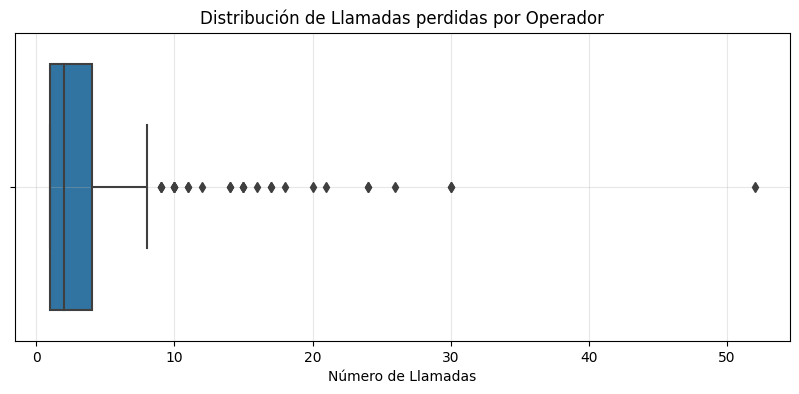

In [58]:
# gráfico de caja y bigotes de valores de las llamadas perdidas por operador
plt.figure(figsize=(10, 4))
sns.boxplot(x=valores_llamadas_perdidas)
plt.title('Distribución de Llamadas perdidas por Operador')
plt.xlabel('Número de Llamadas')
plt.grid(True, alpha=0.3)
plt.show()

Nuevamente se observan valores muy a la derecha del valor máximo y por encima del rango intercuantílico de Q3 más de 1.5 veces. Por lo que estos datos tampoco se encuentran bajo una distribución normal.

Ahora se aplicará el test de Shapiro-Wilk para terminar de concluir el tipo de distribución.

In [59]:
# aplicacion del test de Shapiro-Wilk
shapiro_method(valores_llamadas_perdidas)

=== PRUEBA DE NORMALIDAD ===
Shapiro-Wilk estadístico: 0.5241
p-valor: 0.000000
Nivel de significancia: 0.05
❌ RECHAZAMOS H0: Los datos NO siguen distribución normal


Al aplicar el test de Shapiro-Wilk tenemos como resutlado de que los valores de las llamadas perdidas generadas por los operadores no siguen una distribución normal, con esto se define que prueba estadística utilizar para comprobar la hipótesis inicial, ver la diferencia de las llamadas perdidas obtenidas por operadores eficientes e ineficientes.

Nuevamente la prueba estadística a utilizar será la de Mann-Whitney debido a que esta es apta para datos que no trabajan bajo una distribución normal.

In [60]:
# copia de los datos de las llamadas perdidas por operador
llamadas_perdidas = missed_calls_by_operator.copy()

# adaptación de los datos para la prueba estadística
llamadas_perdidas = llamadas_perdidas.reset_index()
llamadas_perdidas['operator_id'] = llamadas_perdidas['operator_id'].astype('int')
llamadas_perdidas.columns = ['operator_id', 'missed_calls']

# creación de grupos para la prueba estadística
missed_calls_operadores_eficientes = llamadas_perdidas[~llamadas_perdidas['operator_id'].isin(operadores_ineficientes_clean)]['missed_calls']
missed_calls_operadores_ineficientes = llamadas_perdidas[llamadas_perdidas['operator_id'].isin(operadores_ineficientes_clean)]['missed_calls']

# aplicación de la prueba estadística
mann_whitney(missed_calls_operadores_eficientes, missed_calls_operadores_ineficientes, alpha=0.05)

=== PRUEBA MANN-WHITNEY U ===
H₀: No hay diferencia significativa entre grupos
H₁: SÍ hay diferencia significativa entre grupos
Nivel de significancia (α): 0.05
--------------------------------------------------
Estadístico U: 6923.0
P-valor: 0.764992
--------------------------------------------------
✅ NO RECHAZAMOS H₀
Conclusión: NO hay evidencia de diferencia significativa entre los grupos


Como resultado de la prueba de hipótesis se tiene que no hay una diferencia estadística lo bastante significativa entre la cantidad de llamadas perdidas obtenidas por los grupos de operadores eficientes e ineficientes con un umbral de significancia estadística del 5%.

Por lo que tratándose de llamadas perdidas, ambos grupos tienen la misma probabilidad de tener llamadas perdidas en el futuro.

# Paso 5. Elaboración de conclsuiones

## Tarifas de mayor relevancia:


Teniendo el gráfico “Registros desarrollados por Mes y Tarifa” que se encuentra en el apartado “Análisis de los registros desarrollados” del paso 3.2 , se observa que la cantidad de registros pertenecientes a los clientes que tienen la tarifa C tienen un volumen superior a comparación de los registros de las otra tarifas en los meses de Septiembre y Octubre, sin embargo, los registros que pertenecen a los clientes con tarifa A incrementan su volumen en el mes de Noviembre dejando a las otras dos tarifas atrás.

Visualizando el gráfico “Porcentaje de registros seguros por Mes y Tarifa” que se encuentra en el apartado de “Impacto” del paso 3.2 en la sección “Análisis de los registros desarrollados” vemos que en los meses de Agosto y Noviembre, los registros de los clientes que tienen la tarifa A tuvo un mayor volumen que las otras dos tarifas, teniendo un porcentaje de 83.26% y 77.60% del total de registros de esa tarifa en los meses respectivos; en cuanto a la tarifa C se tiene un volumen de 82.86% y 77.29% del total de registros desarrollados de esa tarifa en el mes de Septiembre y Octubre, superando a la tarifa A en esos dos meses.

Llegando a la conclusión de que las tarifas que deberían tener una mayor importancia para la empresa son los clientes que pertenecen a las tarifas A y C.

## Impacto de operadores ineficientes:

Teniendo los resultados de las hipótesis 1 y 2 los cuales arrojaron que:

-	Existe una diferencia estadísticamente significativa para comprobar que si existe una diferencia entre la cantidad de llamadas salientes por operadores eficientes e ineficientes

-	El grupo A mostró tener una diferencia estadísticamente significativa de la media de llamadas entrantes realizadas a los operadores a comparación de las otras tarifas, teniendo una mayor media de llamadas entrantes.

Con esto y haciendo referencia a la conclusión anterior, sobre que el grupo de clientes pertenecientes a la tarifa A son de gran valor para la empresa, si se visualiza el gráfico “Porcentaje de registros en riesgo por Mes y Tarifa” que se encuentra en el apartado de “Impacto” del paso 3.2 en la sección “Análisis de los registros desarrollados”, vemos que en los meses de Septiembre y Octubre se tiene un porcentaje de registros desarrollados por operadores ineficientes de 35.77% y 34.34% respectivamente para los clientes de la tarifa A, siendo esto una tercera parte de los registros de los clientes potencialmente valiosos para la empresa en estos meses. También se observa que para el grupo de registros de los clientes que tienen la tarifa C también tuvieron un gran porcentaje de atención por operadores ineficientes en los meses de agosto y noviembre de un 25.31% y 30.96% respectivamente, afectando a otra tarifa potencialmente valiosa para la empresa.

Teniendo como conclusión que el trabajo desarrollado por operadores ineficientes tuvo un impacto considerable en los grupos que son de importancia para la empresa en todos los meses en que fueron recopilados los datos.

## Diferencias entre los grupos de operadores:

Teniendo como grupos de operadores a los eficientes y los ineficientes, podemos decir que si hay diferencias significativas entre ambos grupos.

Aunque la tercera hipótesis comprobada indica que no hay una diferencia estadística entre las llamadas perdidas generadas por cada grupo de operadores, si podemos decir que el volumen de llamadas desarrolladas por ambos grupos de operadores es diferente, teniendo el claro ejemplo en los gráficos de “Porcentaje de registros seguros por Mes y Tarifa” y “Porcentaje de registros en riesgo por Mes y Tarifa” que se encuentran en la sección de “Impacto” del paso 3.2 en la sección “Análisis de los registros desarrollados”, siendo razón de que la mayor parte de los registros atendidos en el periodo de agosto – noviembre del 2019 fueron desarrollados por operadores eficientes.

A su vez se tiene que de los 1092 operadores que trabajan en la empresa CallMeMaybe, 569 operadores son los que entran en la categoría de ineficientes, es decir un 52.1% del total de operadores; a su vez este grupo de operadores tuvo métricas diferentes que los categorizaron de esa manera, las cuales fueron:

-	Llamadas entrantes que superaron los 10 minutos del tiempo de espera.

-	Una tasa de llamadas perdidas superior al 10% del total de llamadas que recibieron.

-	Operadores que realizaron menos de 30 llamadas salientes en el periodo de agosto – noviembre del 2019.

Métricas que los diferencian del resto de operadores.


## Acciones a llevar a cabo para reducir el impacto negativo en la empresa:

Una de las posibles acciones que se pueden llevar a cabo para evitar el posible impacto negativo en la empresa en futuras llamadas será el implementar una capacitación global para todos los operadores, con el fin de asegurar que todos y cada uno de ellos conocen los procedimientos del desarrollo de las llamadas que ellos tengan, ya sea recibir llamadas que vienen de los clientes o realizar llamadas para comunicar lo que solicite el cliente, con esto se espera obtener un aumento en la eficiencia de cada operador disminuyendo en gran medida los operadores que pudieran tener métricas que los categoricen como ineficientes

Otra acción para llevar a cabo será realizar una reestructuración de la carga laboral, para asegurar que no haya sobre carga sobre ciertos operadores de modo que esta carga laboral no genere como consecuencia un aumento en las métricas de alto riesgo, que en este caso son las métricas de:

-	Alta cantidad de llamadas perdidas por operador

-	Alto tiempo de espera de las llamadas entrantes

-	Baja cantidad de llamadas salientes por operador

Por último, una acción preventiva es realizar un estudio de los requerimientos de los clientes, con el fin de determinar aquellos clientes que tengan una mayor demanda de los servicios proporcionados por la empresa CallMeMaybe para poder organizar mejor el equipo de operadores para darle prioridad a los clientes que mayor demanda tienen antes que a los restantes.